<a href="https://colab.research.google.com/github/naqirraza99/CS-351L---AI-Lab1_2022574/blob/main/Lab%203/Lab_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

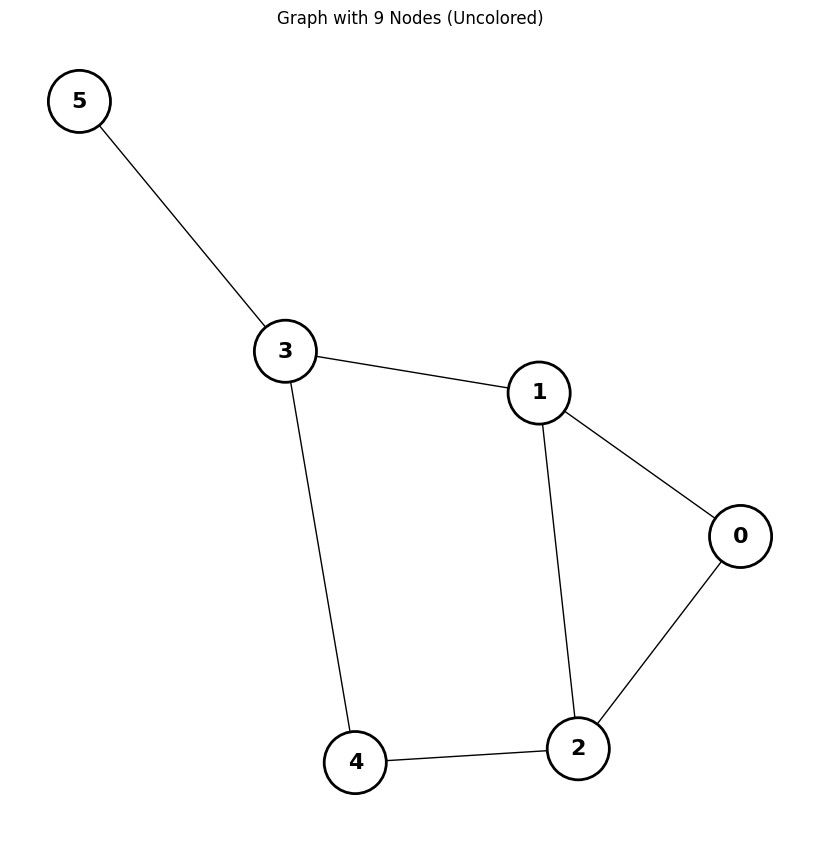

In [ ]:
# Install necessary libraries (if needed)
# !pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Define the graph with 9 vertices (0 to 8) and edges (connections)
G = nx.Graph()
edges = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 4), (3, 4), (3, 5)]
G.add_edges_from(edges)

# Step 2: Visualize the graph without any colors (uncolored state)
def visualize_uncolored_graph():
    plt.figure(figsize=(8, 8))  # Increase the figure size for better clarity
    pos = nx.spring_layout(G, seed=42)  # Use spring layout for better node spacing
    # Nodes are all colored white (uncolored)
    node_colors = ['#ffffff'] * len(G.nodes)  # White color for nodes
    edge_colors = 'black'  # Black edges
    node_border_color = 'black'  # Black border for node circles

    nx.draw(G, pos, with_labels=True, node_color=node_colors, font_weight='bold',
            node_size=2000, font_size=16, font_color='black', edge_color=edge_colors,
            linewidths=2, node_shape='o',  # 'o' for circular nodes
            edgecolors=node_border_color)  # Set the border color of the nodes

    plt.title("Graph with 9 Nodes (Uncolored)")
    plt.show()

# Step 3: Display the graph
visualize_uncolored_graph()


Step 1: Node 0 colored Yellow


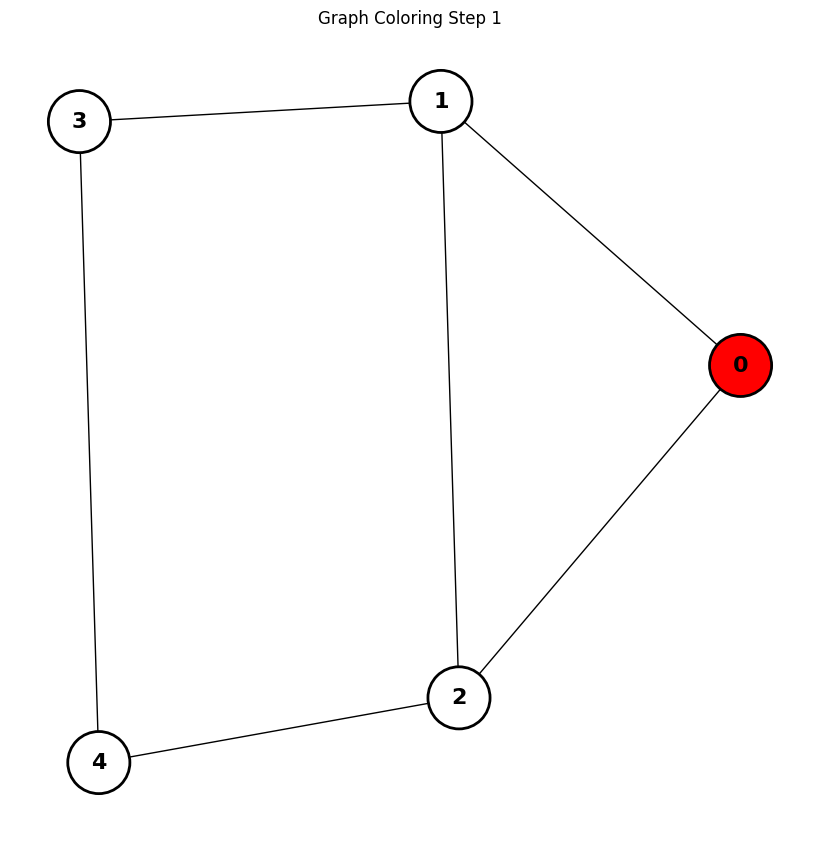

Step 2: Node 1 colored Pink


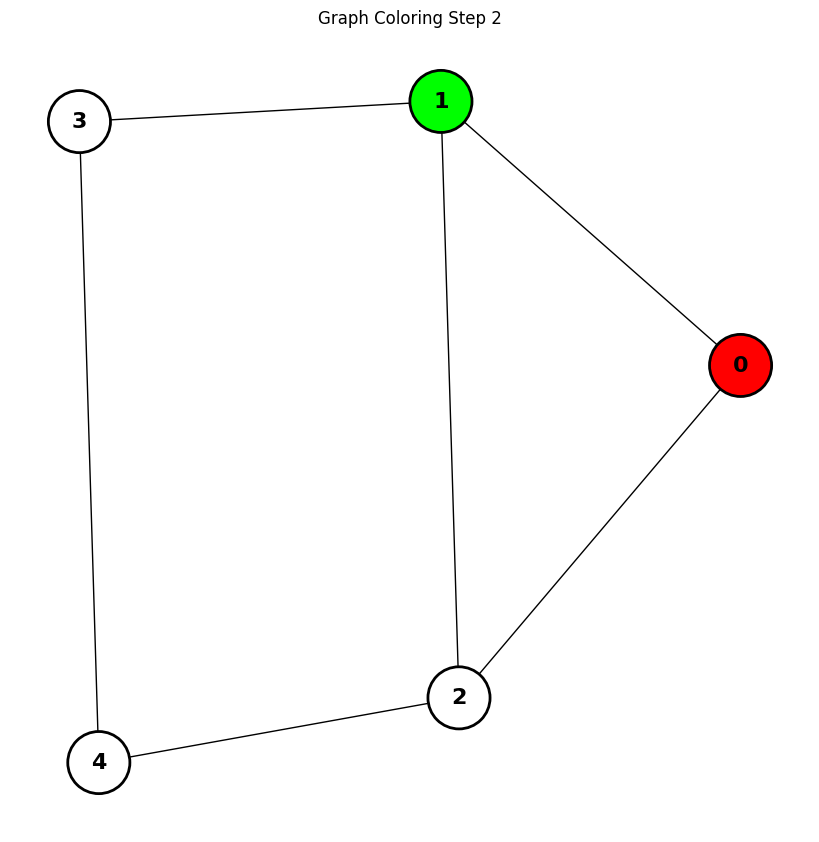

Step 3: Node 2 colored Blue


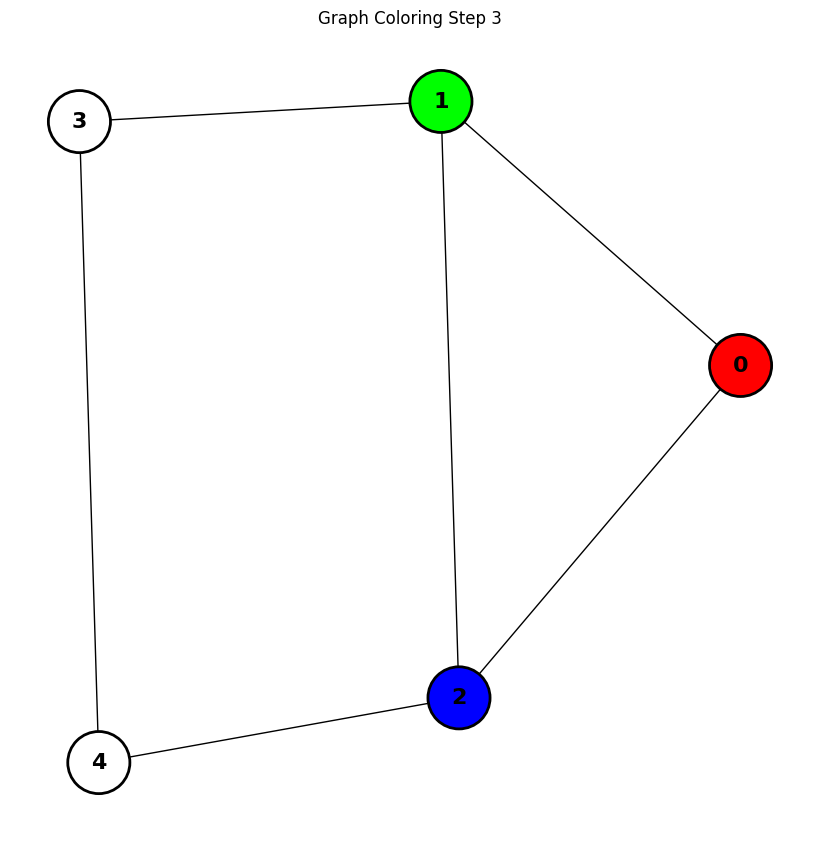

Step 4: Node 3 colored Yellow


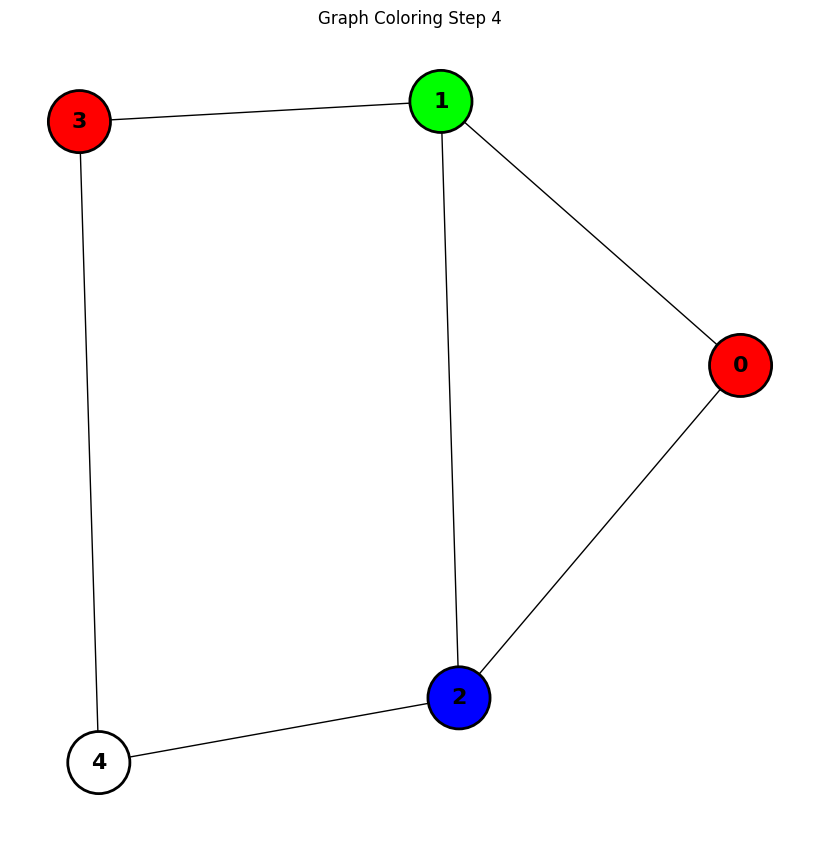

Step 5: Node 4 colored Pink


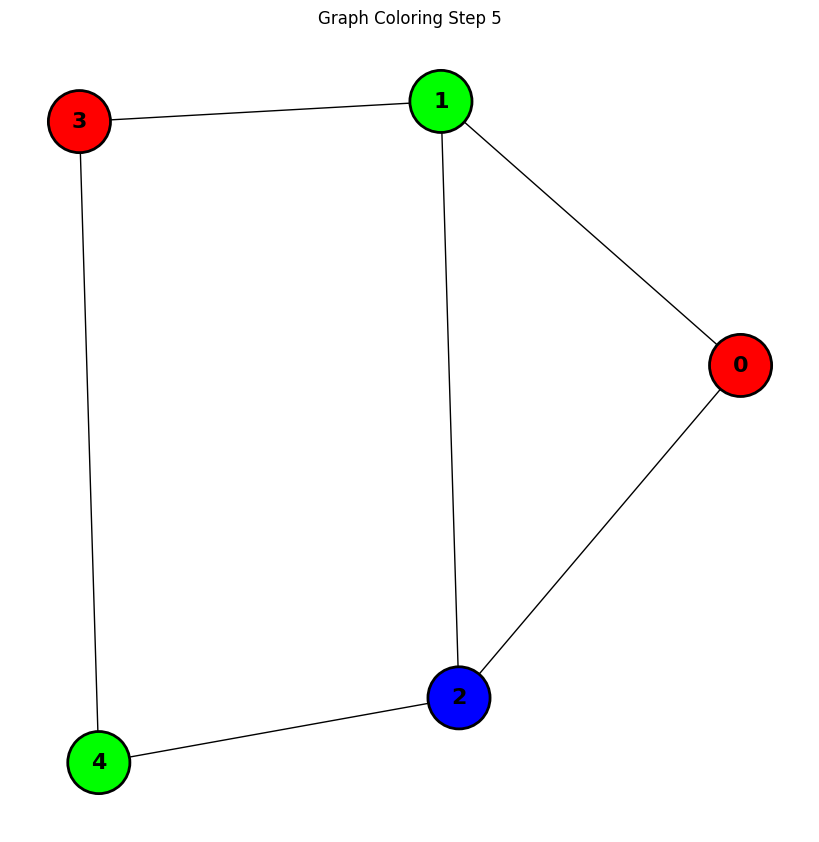

Final Assignment: {0: 'Yellow', 1: 'Pink', 2: 'Blue', 3: 'Yellow', 4: 'Pink'}


In [ ]:
# !pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Define the graph with 9 vertices and the edges (connections)
G = nx.Graph()
edges = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 4), (3, 4)]
G.add_edges_from(edges)

# Step 2: Define the available colors
colors = ['Yellow', 'Pink', 'Blue']

# Step 3: Function to visualize the graph coloring step by step
def visualize_graph(assignment, step):
    plt.figure(figsize=(8, 8))  # Increase the figure size for better clarity
    pos = nx.spring_layout(G, seed=42)  # Use spring layout for better node spacing

    # Default color for uncolored nodes is white
    node_colors = ['#ffffff'] * len(G.nodes)
    # Assign colors to the nodes based on the current assignment
    for node, color in assignment.items():
        if color == 'Yellow':
            node_colors[node] = '#FF0000'
        elif color == 'Pink':
            node_colors[node] = '#00FF00'
        elif color == 'Blue':
            node_colors[node] = '#0000FF'

    # Draw the graph with current color assignments
    nx.draw(G, pos, with_labels=True, node_color=node_colors, font_weight='bold',
            node_size=2000, font_size=16, font_color='black', edge_color='black',
            linewidths=2, node_shape='o', edgecolors='black')

    plt.title(f"Graph Coloring Step {step}")
    plt.show()

# Step 4: Function to check if a color assignment is valid
def is_valid_color(node, color, assignment):
    # Check all neighboring nodes to ensure no conflict (no neighbor has the same color)
    for neighbor in G.neighbors(node):
        if neighbor in assignment and assignment[neighbor] == color:
            return False  # Conflict found
    return True  # No conflict

# Step 5: Function to color the graph with conflict checking (sequential assignment)
def color_graph_with_conflict_checking():
    assignment = {}  # Dictionary to store node-color assignment
    node_list = list(G.nodes)  # Get the list of nodes in the graph

    # Step through each node and assign colors while checking for conflicts
    for i, node in enumerate(node_list):
        for color in colors:
            if is_valid_color(node, color, assignment):
                assignment[node] = color  # Assign the color
                print(f"=======================================")
                print(f"Step {i+1}: Node {node} colored {color}")
                print(f"=======================================")
                visualize_graph(assignment, i+1)  # Visualize the graph at each step
                break  # Move to the next node once a valid color is found

    return assignment

# Step 6: Color the graph and display the process step by step
final_assignment = color_graph_with_conflict_checking()

print("Final Assignment:", final_assignment)

Enter the number of nodes: 1
Choose a heuristic:
1. Minimum Remaining Values (MRV)
2. Degree Heuristic
Enter 1 or 2: 1


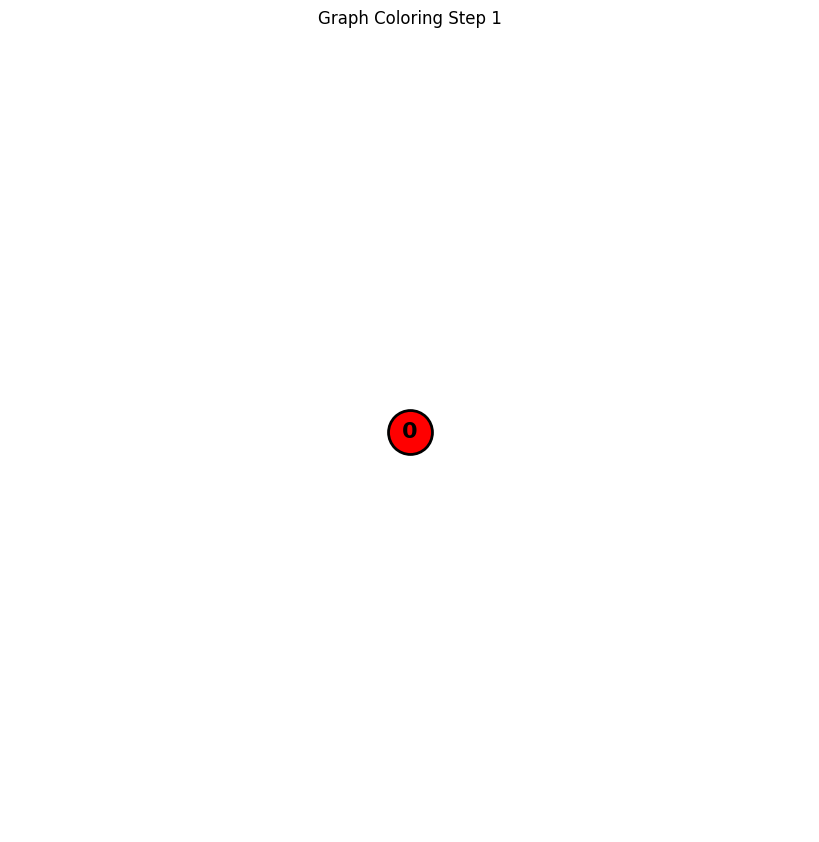

Final Assignment: {0: '#FF0000'}


In [ ]:
# Install necessary libraries (if needed)
# !pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt
import random

# Step 1: Automatically generate a set of colors based on the number of nodes
def generate_colors(num_nodes):
    color_list = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF', '#00FFFF', '#800080', '#FFA500', '#00FF7F']
    return color_list[:min(num_nodes, len(color_list))]

# Step 2: Function to create a random graph with the specified number of nodes
def create_random_graph(num_nodes):
    G = nx.gnp_random_graph(num_nodes, 0.4, seed=42)  # Random graph generation
    return G

# Step 3: Visualize the graph coloring step by step
def visualize_graph(G, assignment, step, pos):
    plt.figure(figsize=(8, 8))  # Increase the figure size for better clarity

    # Default color for uncolored nodes is white
    node_colors = ['#ffffff'] * len(G.nodes)
    # Assign colors to the nodes based on the current assignment
    for node, color in assignment.items():
        node_colors[node] = color

    # Draw the graph with current color assignments
    nx.draw(G, pos, with_labels=True, node_color=node_colors, font_weight='bold',
            node_size=1000, font_size=16, font_color='black', edge_color='black',
            linewidths=2, node_shape='o', edgecolors='black')

    plt.title(f"Graph Coloring Step {step}")
    plt.show()

# Step 4: Function to check if a color assignment is valid
def is_valid_color(G, node, color, assignment):
    # Check all neighboring nodes to ensure no conflict (no neighbor has the same color)
    for neighbor in G.neighbors(node):
        if neighbor in assignment and assignment[neighbor] == color:
            return False  # Conflict found
    return True  # No conflict

# Step 5: Minimum Remaining Values (MRV) Heuristic
def select_unassigned_node_MRV(G, assignment, colors):
    unassigned_nodes = [node for node in G.nodes if node not in assignment]
    # For each unassigned node, count the number of legal values
    mrv_node = None
    min_remaining_values = float('inf')

    for node in unassigned_nodes:
        remaining_values = sum(is_valid_color(G, node, color, assignment) for color in colors)
        if remaining_values < min_remaining_values:
            min_remaining_values = remaining_values
            mrv_node = node

    return mrv_node

# Step 6: Degree Heuristic
def select_unassigned_node_Degree(G, assignment):
    unassigned_nodes = [node for node in G.nodes if node not in assignment]
    # Select the node with the highest number of uncolored neighbors (degree)
    degree_node = max(unassigned_nodes, key=lambda node: len([n for n in G.neighbors(node) if n not in assignment]))
    return degree_node

# Step 7: Backtracking with Heuristics
def backtracking_with_heuristics(G, assignment, heuristic, step, colors, pos):
    if len(assignment) == len(G.nodes):
        return assignment  # All nodes are colored

    # Choose the next node to assign a color using the chosen heuristic
    if heuristic == 'MRV':
        node = select_unassigned_node_MRV(G, assignment, colors)
    elif heuristic == 'Degree':
        node = select_unassigned_node_Degree(G, assignment)
    else:
        node = list(G.nodes)[len(assignment)]  # Fallback, default to a sequential assignment

    for color in colors:
        if is_valid_color(G, node, color, assignment):
            assignment[node] = color  # Assign the color
            visualize_graph(G, assignment, step, pos)  # Visualize the current step
            result = backtracking_with_heuristics(G, assignment, heuristic, step+1, colors, pos)
            if result:
                return result  # Return if a valid coloring is found
            del assignment[node]  # Backtrack if no valid solution is found

    return None  # No solution found, backtrack

# Step 8: Function to let user choose number of nodes, backtracking heuristic, and random graph
def color_graph_with_user_input():
    # Ask the user for the number of nodes
    num_nodes = int(input("Enter the number of nodes: "))

    # Generate colors based on the number of nodes
    colors = generate_colors(num_nodes)

    # Create a random graph
    G = create_random_graph(num_nodes)

    # Choose a heuristic
    print("Choose a heuristic:")
    print("1. Minimum Remaining Values (MRV)")
    print("2. Degree Heuristic")
    choice = input("Enter 1 or 2: ")

    if choice == '1':
        heuristic = 'MRV'
    elif choice == '2':
        heuristic = 'Degree'
    else:
        print("Invalid choice. Defaulting to sequential assignment.")
        heuristic = None

    pos = nx.spring_layout(G, seed=42)  # Generate the position for the graph layout

    # Perform backtracking with the chosen heuristic
    final_assignment = backtracking_with_heuristics(G, {}, heuristic, 1, colors, pos)
    print("Final Assignment:", final_assignment)

# Step 9: Run the graph coloring with user input
color_graph_with_user_input()

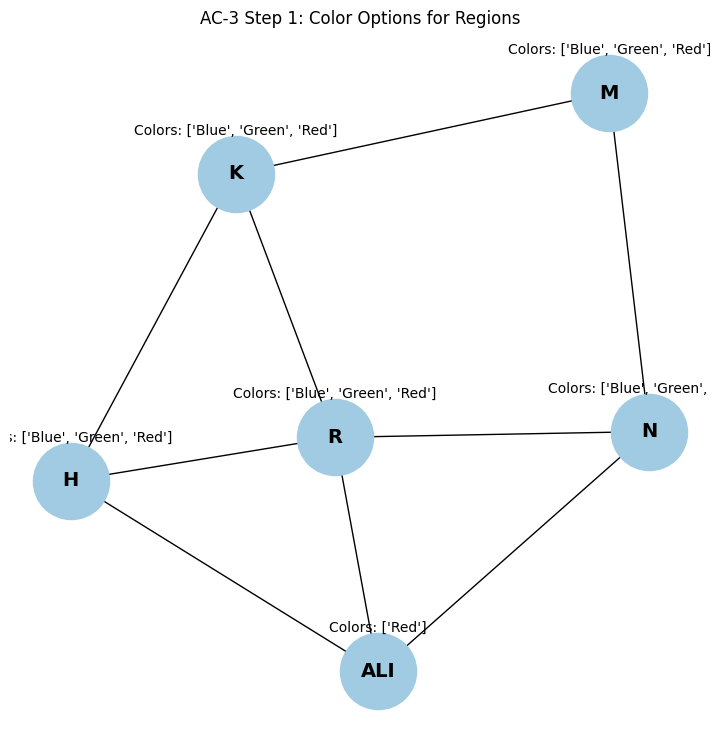


Domains after Step 2:
  ALI: {'Red'}
  N: {'Green', 'Blue', 'Red'}
  R: {'Green', 'Blue', 'Red'}
  H: {'Green', 'Blue', 'Red'}
  M: {'Green', 'Blue', 'Red'}
  K: {'Green', 'Blue', 'Red'}


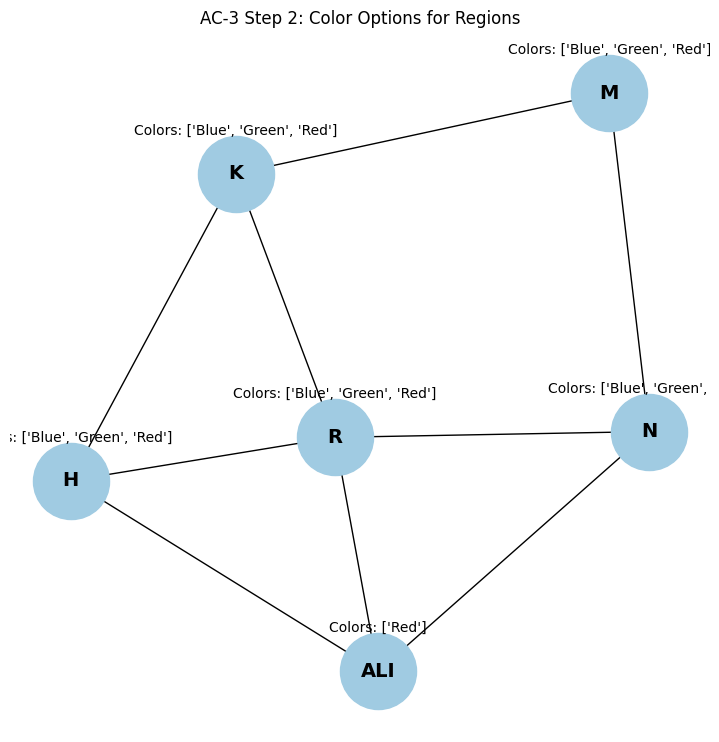


Domains after Step 3:
  ALI: {'Red'}
  N: {'Green', 'Blue', 'Red'}
  R: {'Green', 'Blue', 'Red'}
  H: {'Green', 'Blue', 'Red'}
  M: {'Green', 'Blue', 'Red'}
  K: {'Green', 'Blue', 'Red'}


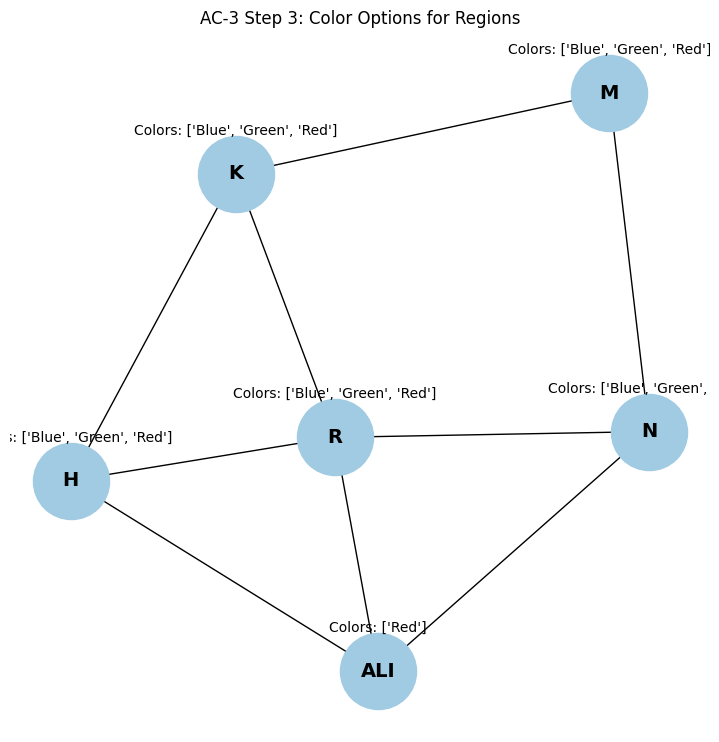


Domains after Step 4:
  ALI: {'Red'}
  N: {'Green', 'Blue', 'Red'}
  R: {'Green', 'Blue', 'Red'}
  H: {'Green', 'Blue', 'Red'}
  M: {'Green', 'Blue', 'Red'}
  K: {'Green', 'Blue', 'Red'}


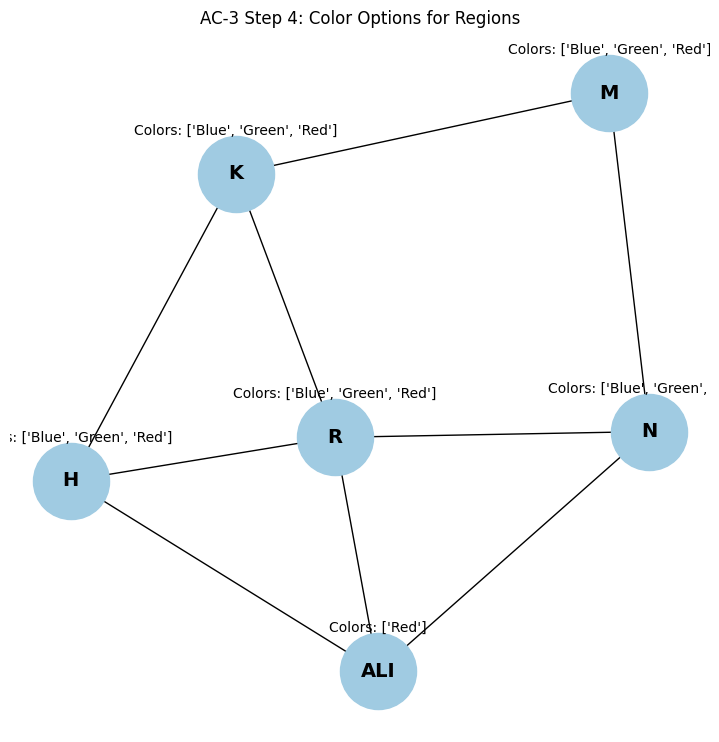


Domains after Step 5:
  ALI: {'Red'}
  N: {'Green', 'Blue', 'Red'}
  R: {'Green', 'Blue', 'Red'}
  H: {'Green', 'Blue', 'Red'}
  M: {'Green', 'Blue', 'Red'}
  K: {'Green', 'Blue', 'Red'}


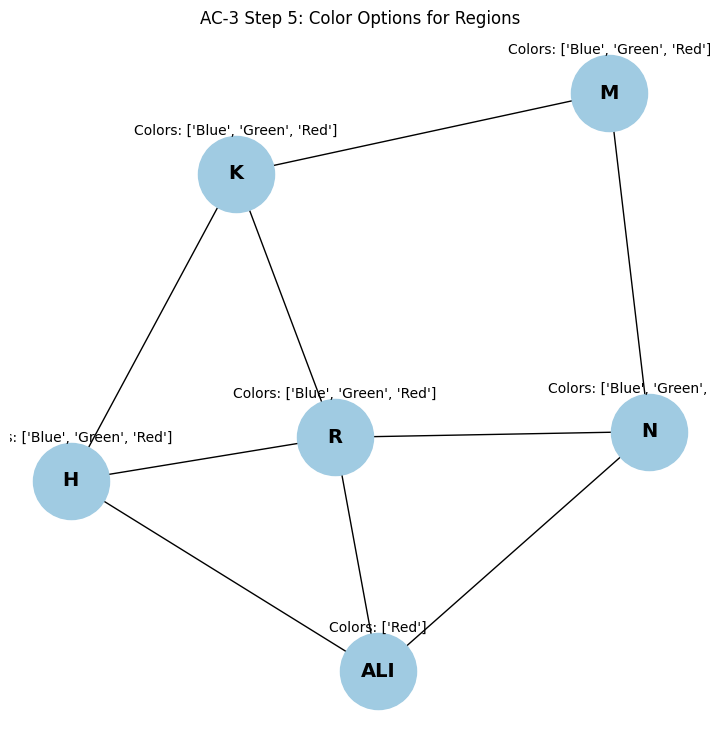


Domains after Step 6:
  ALI: {'Red'}
  N: {'Green', 'Blue', 'Red'}
  R: {'Green', 'Blue', 'Red'}
  H: {'Green', 'Blue', 'Red'}
  M: {'Green', 'Blue', 'Red'}
  K: {'Green', 'Blue', 'Red'}


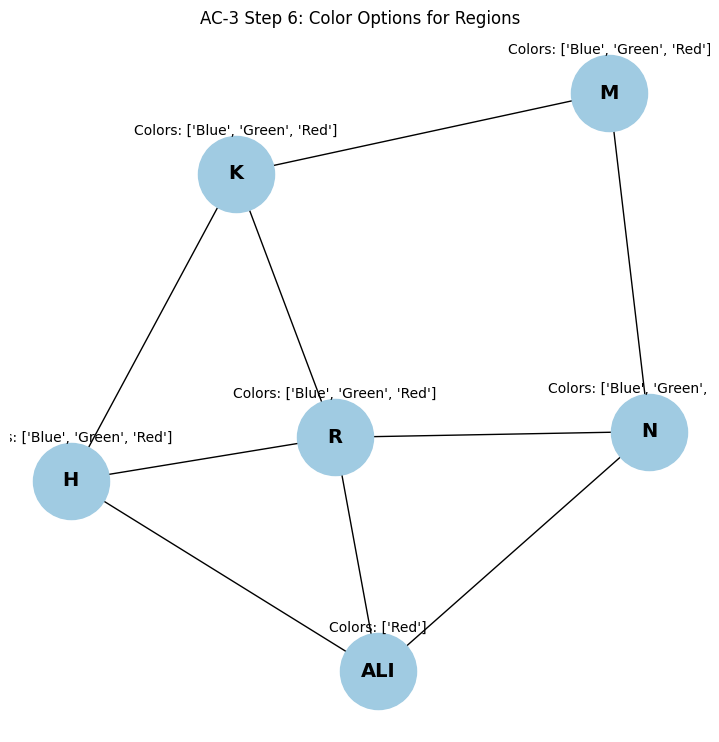


Domains after Step 7:
  ALI: {'Red'}
  N: {'Green', 'Blue', 'Red'}
  R: {'Green', 'Blue', 'Red'}
  H: {'Green', 'Blue', 'Red'}
  M: {'Green', 'Blue', 'Red'}
  K: {'Green', 'Blue', 'Red'}


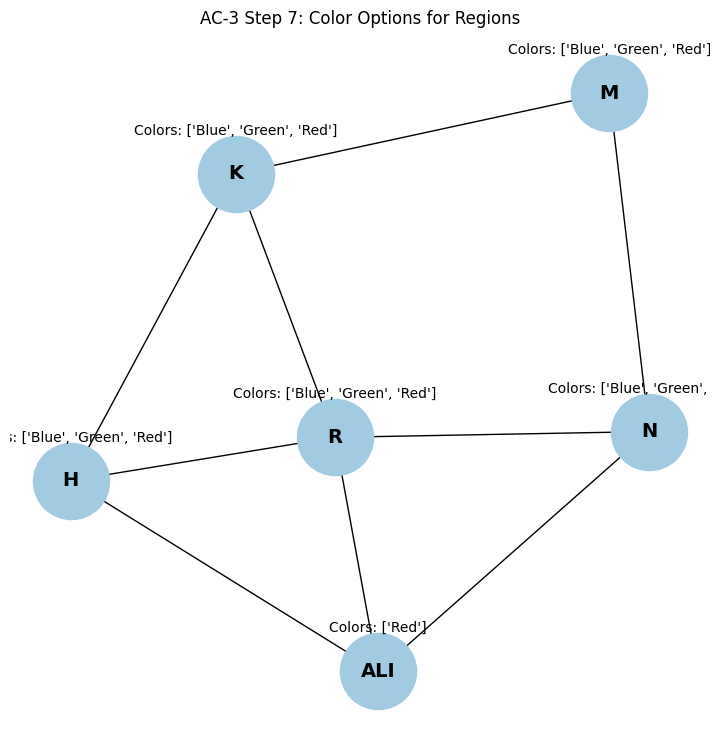


Domains after Step 8:
  ALI: {'Red'}
  N: {'Green', 'Blue', 'Red'}
  R: {'Green', 'Blue', 'Red'}
  H: {'Green', 'Blue', 'Red'}
  M: {'Green', 'Blue', 'Red'}
  K: {'Green', 'Blue', 'Red'}


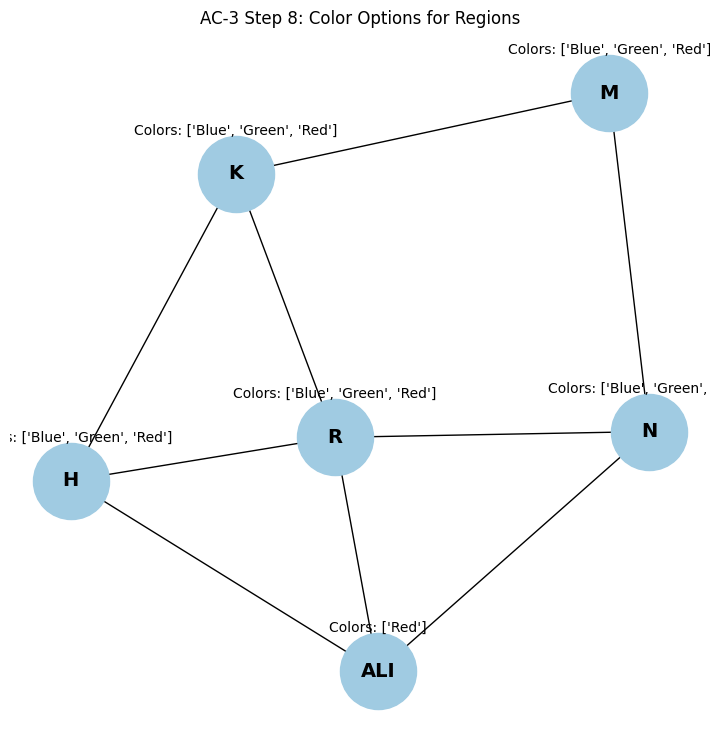


Domains after Step 9:
  ALI: {'Red'}
  N: {'Green', 'Blue', 'Red'}
  R: {'Green', 'Blue', 'Red'}
  H: {'Green', 'Blue', 'Red'}
  M: {'Green', 'Blue', 'Red'}
  K: {'Green', 'Blue', 'Red'}


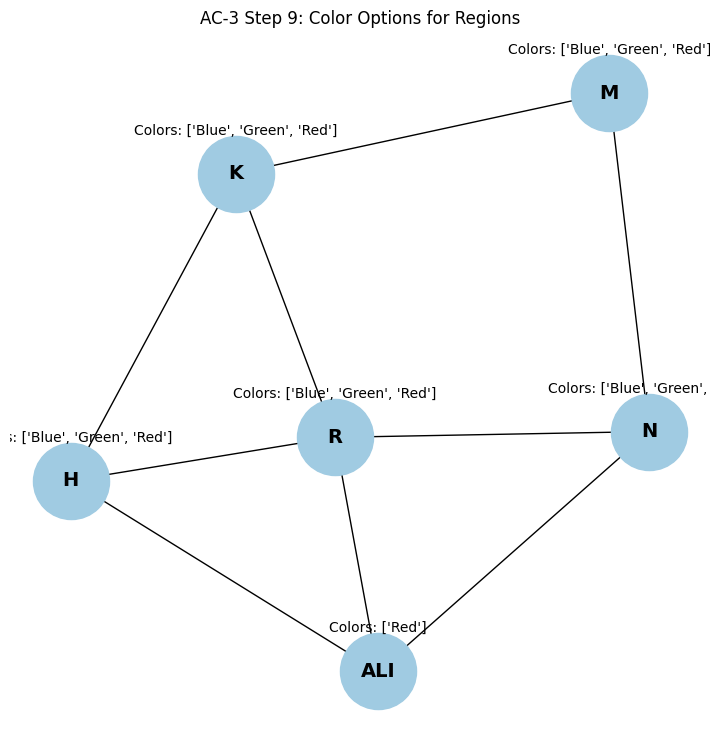


Domains after Step 10:
  ALI: {'Red'}
  N: {'Green', 'Blue', 'Red'}
  R: {'Green', 'Blue', 'Red'}
  H: {'Green', 'Blue', 'Red'}
  M: {'Green', 'Blue', 'Red'}
  K: {'Green', 'Blue', 'Red'}


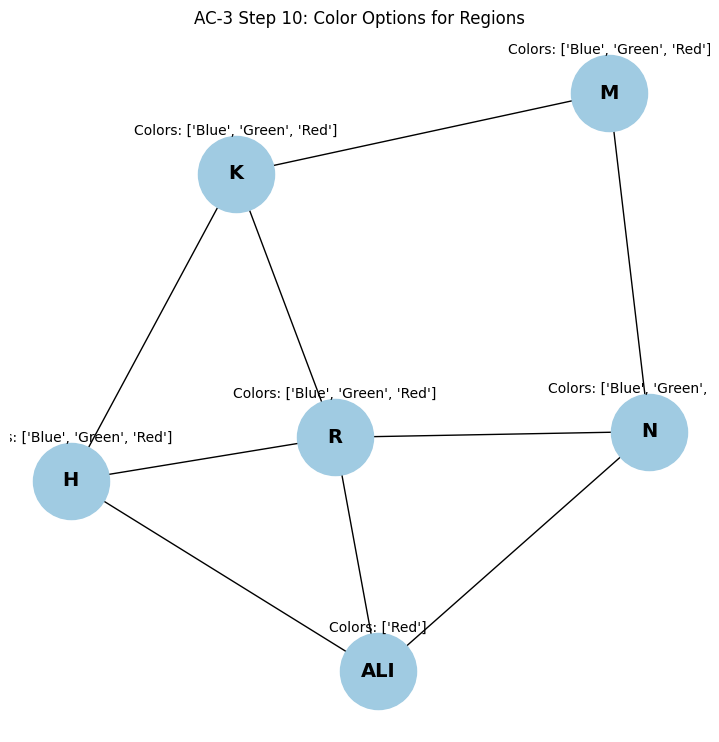

Removed 'Red' from domain of 'N' because all values in domain of 'ALI' are equal to 'Red'.

Domains after Step 11:
  ALI: {'Red'}
  N: {'Green', 'Blue'}
  R: {'Green', 'Blue', 'Red'}
  H: {'Green', 'Blue', 'Red'}
  M: {'Green', 'Blue', 'Red'}
  K: {'Green', 'Blue', 'Red'}


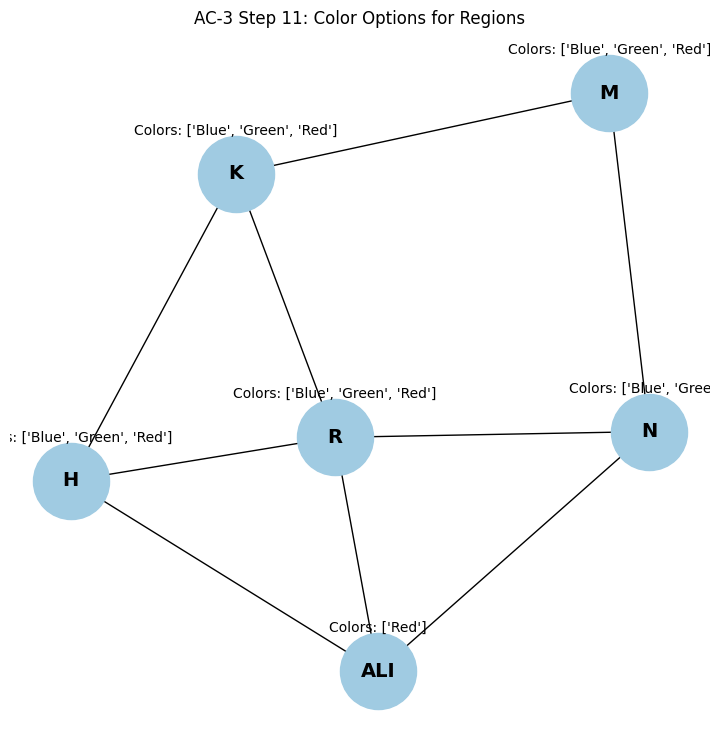

Removed 'Red' from domain of 'R' because all values in domain of 'ALI' are equal to 'Red'.

Domains after Step 12:
  ALI: {'Red'}
  N: {'Green', 'Blue'}
  R: {'Green', 'Blue'}
  H: {'Green', 'Blue', 'Red'}
  M: {'Green', 'Blue', 'Red'}
  K: {'Green', 'Blue', 'Red'}


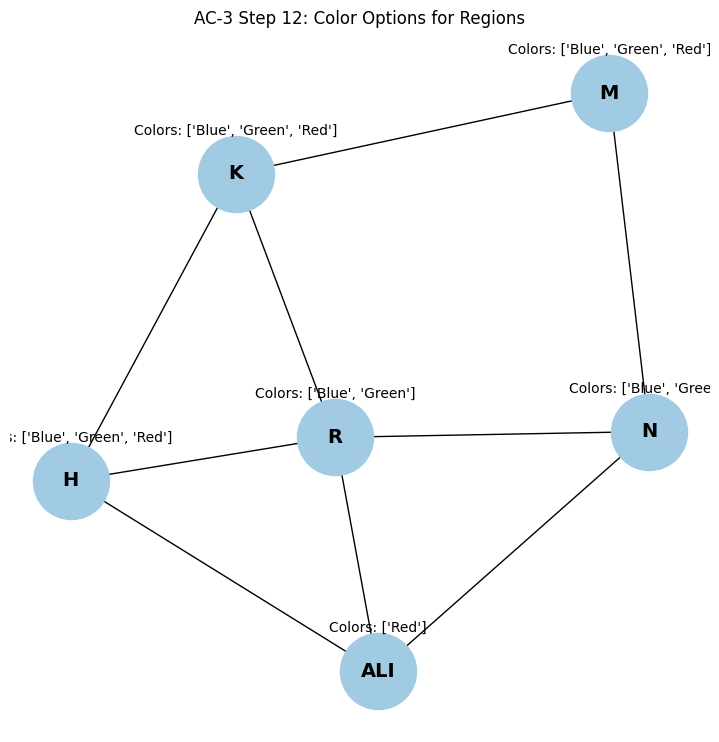

Removed 'Red' from domain of 'H' because all values in domain of 'ALI' are equal to 'Red'.

Domains after Step 13:
  ALI: {'Red'}
  N: {'Green', 'Blue'}
  R: {'Green', 'Blue'}
  H: {'Green', 'Blue'}
  M: {'Green', 'Blue', 'Red'}
  K: {'Green', 'Blue', 'Red'}


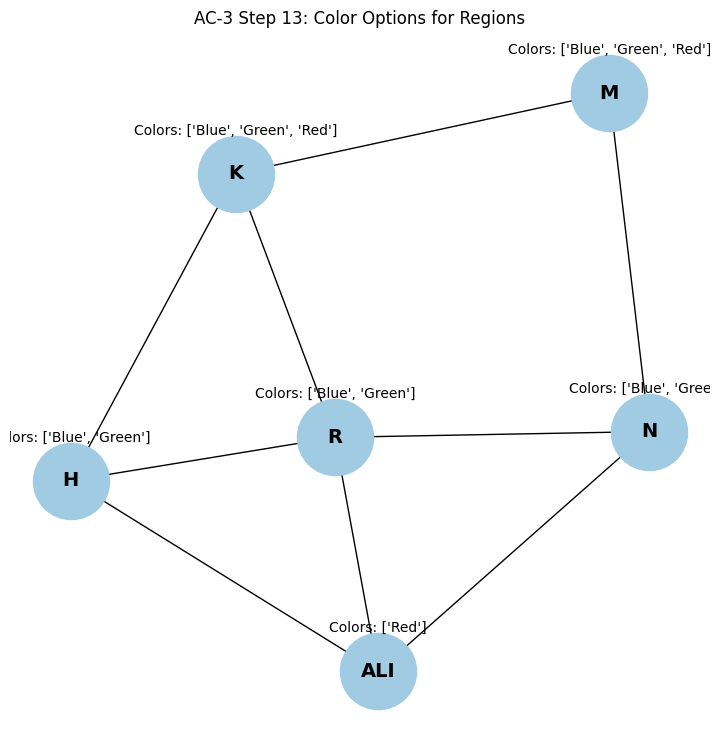


Domains after Step 14:
  ALI: {'Red'}
  N: {'Green', 'Blue'}
  R: {'Green', 'Blue'}
  H: {'Green', 'Blue'}
  M: {'Green', 'Blue', 'Red'}
  K: {'Green', 'Blue', 'Red'}


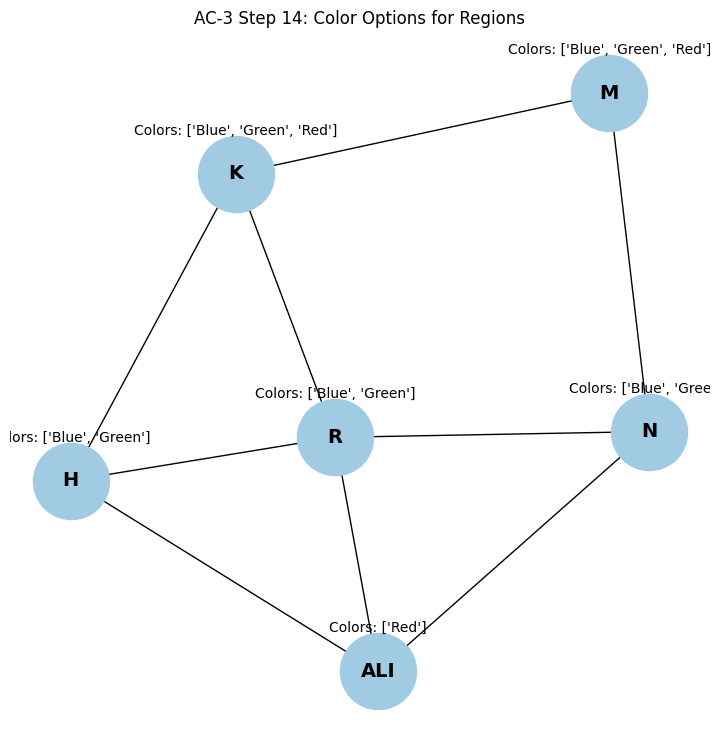


Domains after Step 15:
  ALI: {'Red'}
  N: {'Green', 'Blue'}
  R: {'Green', 'Blue'}
  H: {'Green', 'Blue'}
  M: {'Green', 'Blue', 'Red'}
  K: {'Green', 'Blue', 'Red'}


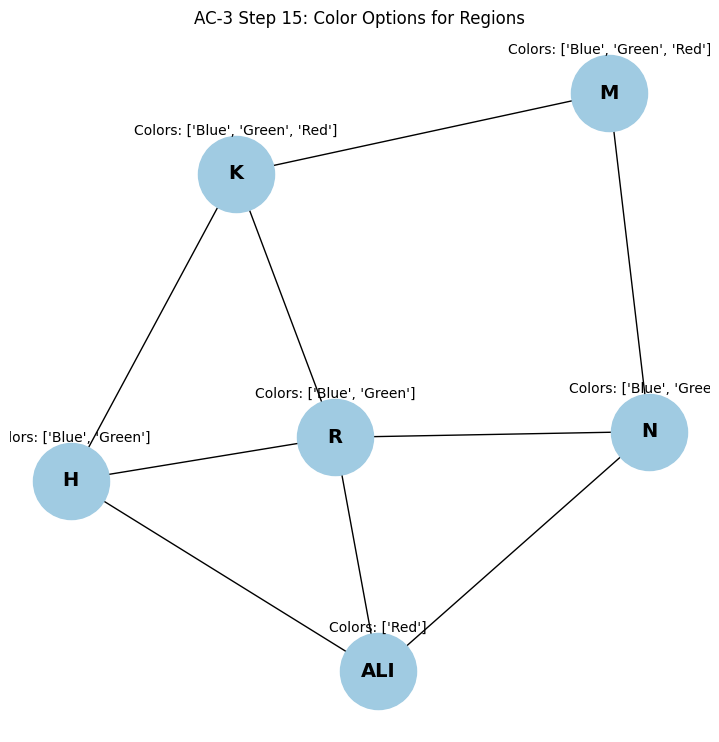


Domains after Step 16:
  ALI: {'Red'}
  N: {'Green', 'Blue'}
  R: {'Green', 'Blue'}
  H: {'Green', 'Blue'}
  M: {'Green', 'Blue', 'Red'}
  K: {'Green', 'Blue', 'Red'}


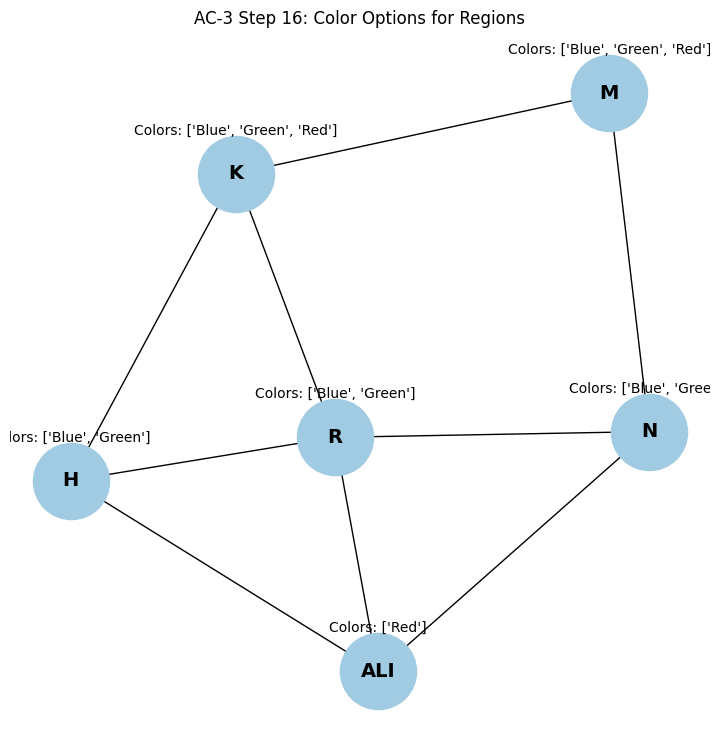


Domains after Step 17:
  ALI: {'Red'}
  N: {'Green', 'Blue'}
  R: {'Green', 'Blue'}
  H: {'Green', 'Blue'}
  M: {'Green', 'Blue', 'Red'}
  K: {'Green', 'Blue', 'Red'}


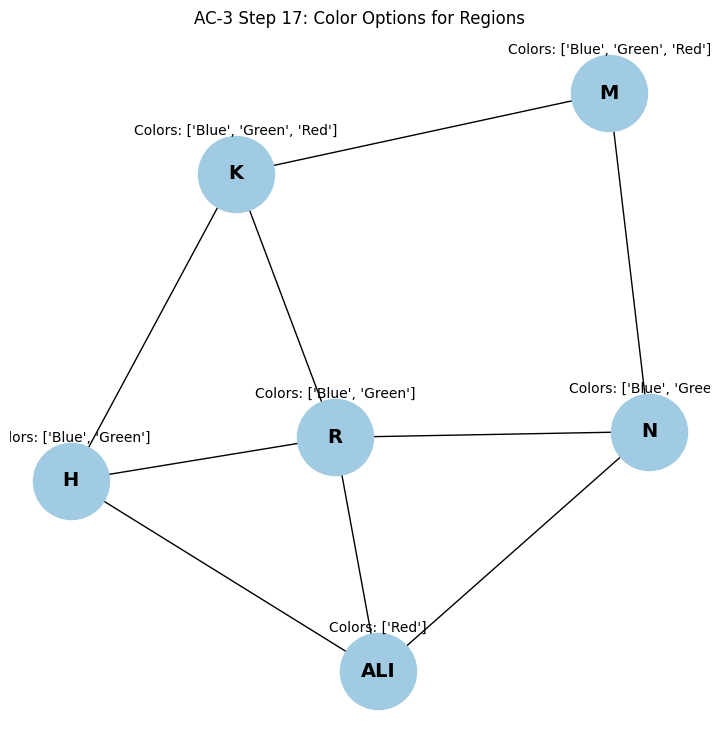


Domains after Step 18:
  ALI: {'Red'}
  N: {'Green', 'Blue'}
  R: {'Green', 'Blue'}
  H: {'Green', 'Blue'}
  M: {'Green', 'Blue', 'Red'}
  K: {'Green', 'Blue', 'Red'}


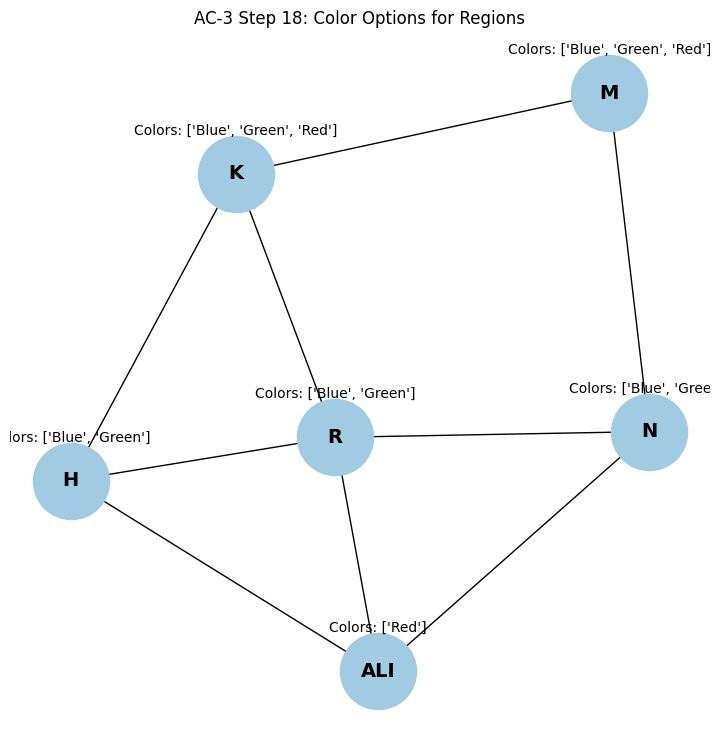


Domains after Step 19:
  ALI: {'Red'}
  N: {'Green', 'Blue'}
  R: {'Green', 'Blue'}
  H: {'Green', 'Blue'}
  M: {'Green', 'Blue', 'Red'}
  K: {'Green', 'Blue', 'Red'}


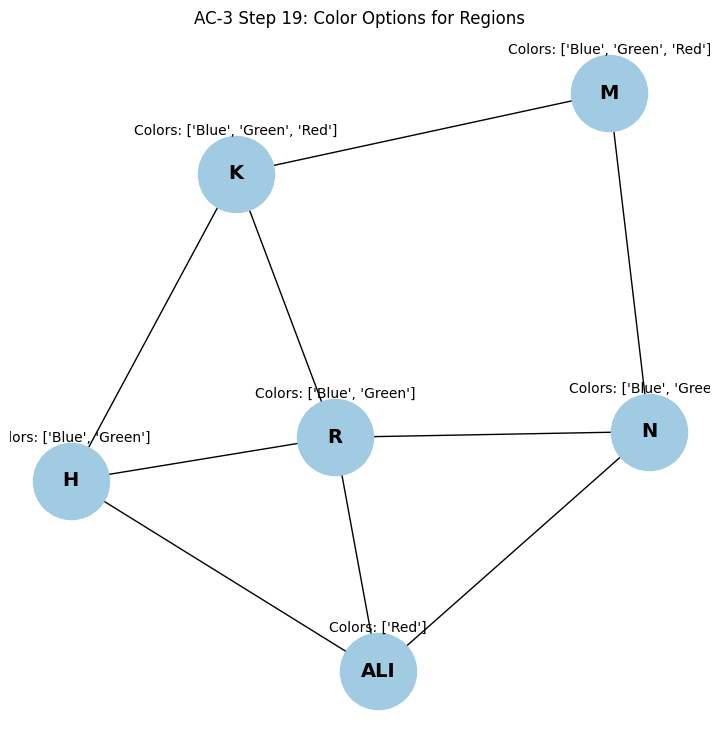


Domains after Step 20:
  ALI: {'Red'}
  N: {'Green', 'Blue'}
  R: {'Green', 'Blue'}
  H: {'Green', 'Blue'}
  M: {'Green', 'Blue', 'Red'}
  K: {'Green', 'Blue', 'Red'}


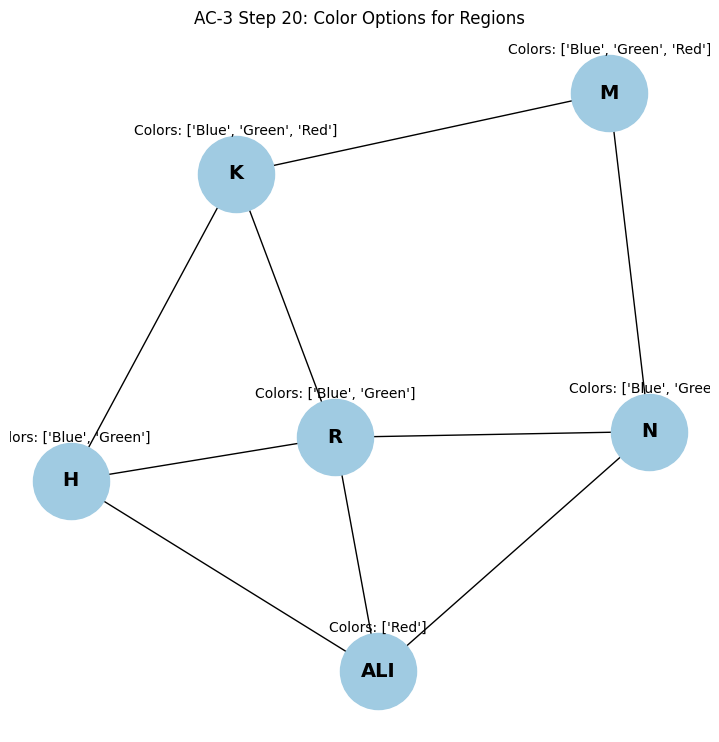


Domains after Step 21:
  ALI: {'Red'}
  N: {'Green', 'Blue'}
  R: {'Green', 'Blue'}
  H: {'Green', 'Blue'}
  M: {'Green', 'Blue', 'Red'}
  K: {'Green', 'Blue', 'Red'}


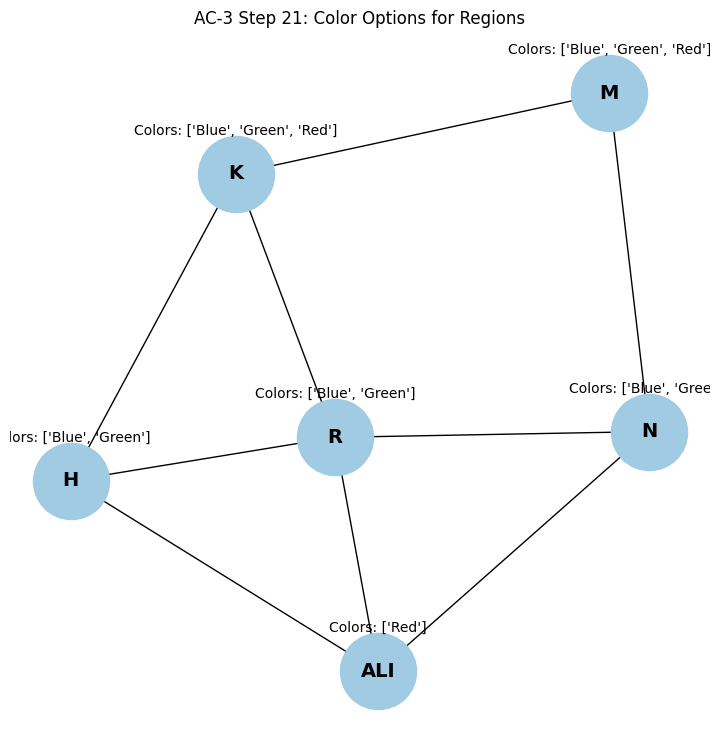


Domains after Step 22:
  ALI: {'Red'}
  N: {'Green', 'Blue'}
  R: {'Green', 'Blue'}
  H: {'Green', 'Blue'}
  M: {'Green', 'Blue', 'Red'}
  K: {'Green', 'Blue', 'Red'}


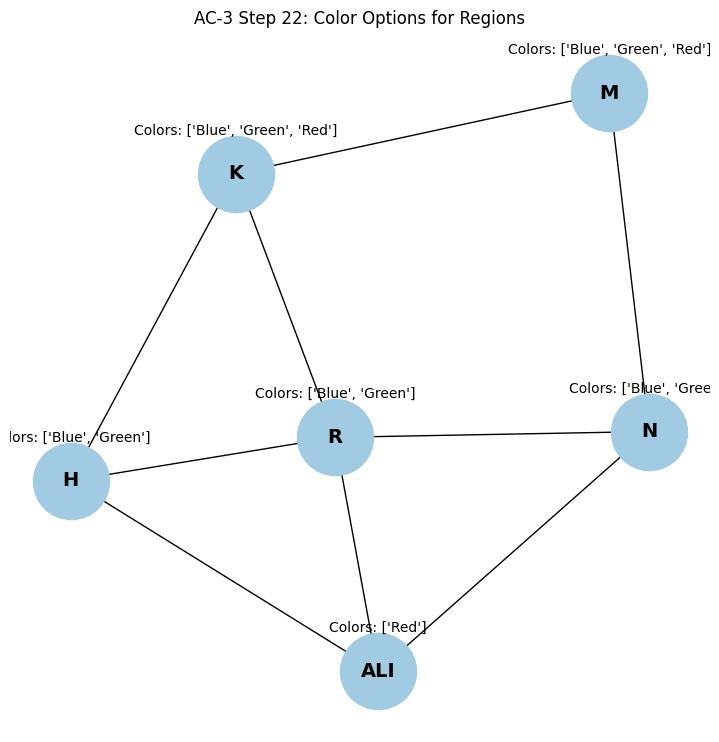


Domains after Step 23:
  ALI: {'Red'}
  N: {'Green', 'Blue'}
  R: {'Green', 'Blue'}
  H: {'Green', 'Blue'}
  M: {'Green', 'Blue', 'Red'}
  K: {'Green', 'Blue', 'Red'}


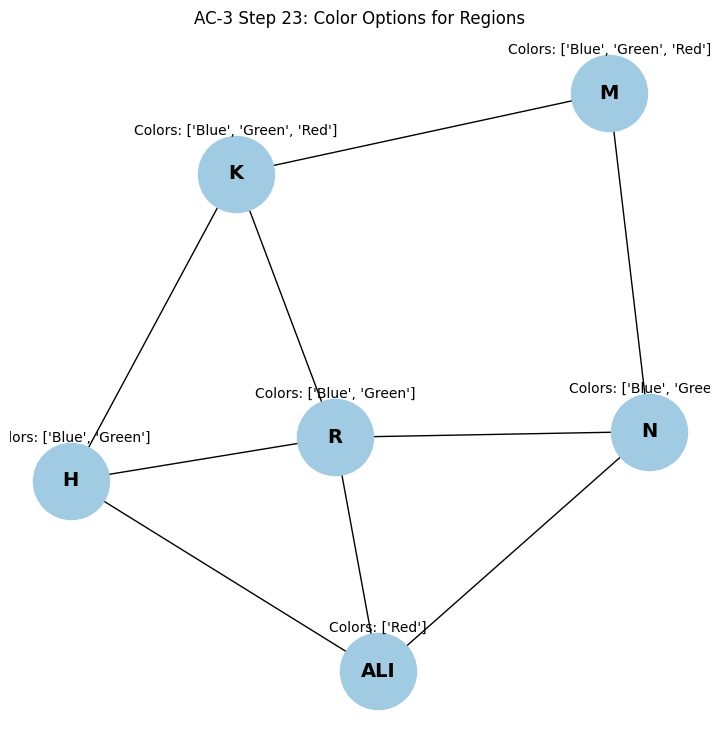


Domains after Step 24:
  ALI: {'Red'}
  N: {'Green', 'Blue'}
  R: {'Green', 'Blue'}
  H: {'Green', 'Blue'}
  M: {'Green', 'Blue', 'Red'}
  K: {'Green', 'Blue', 'Red'}


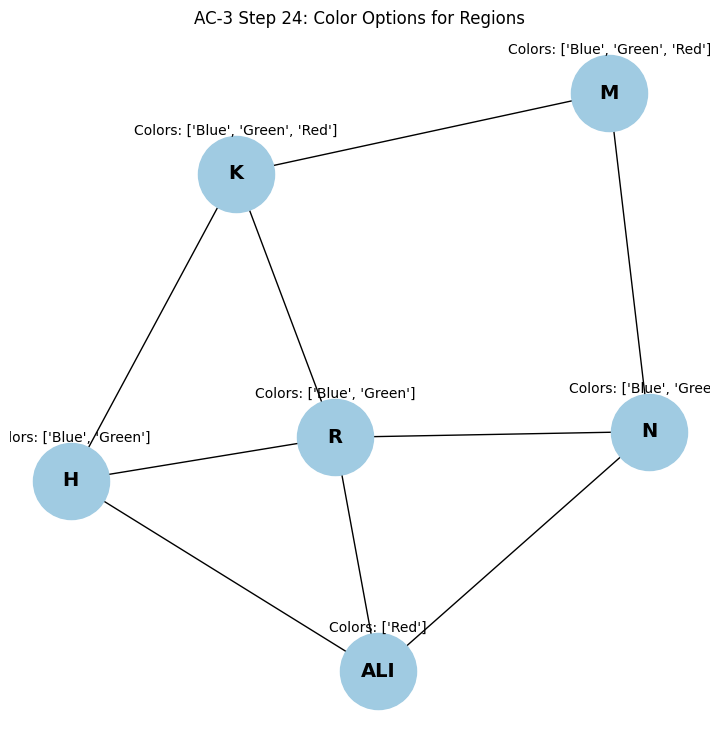


Domains after Step 25:
  ALI: {'Red'}
  N: {'Green', 'Blue'}
  R: {'Green', 'Blue'}
  H: {'Green', 'Blue'}
  M: {'Green', 'Blue', 'Red'}
  K: {'Green', 'Blue', 'Red'}


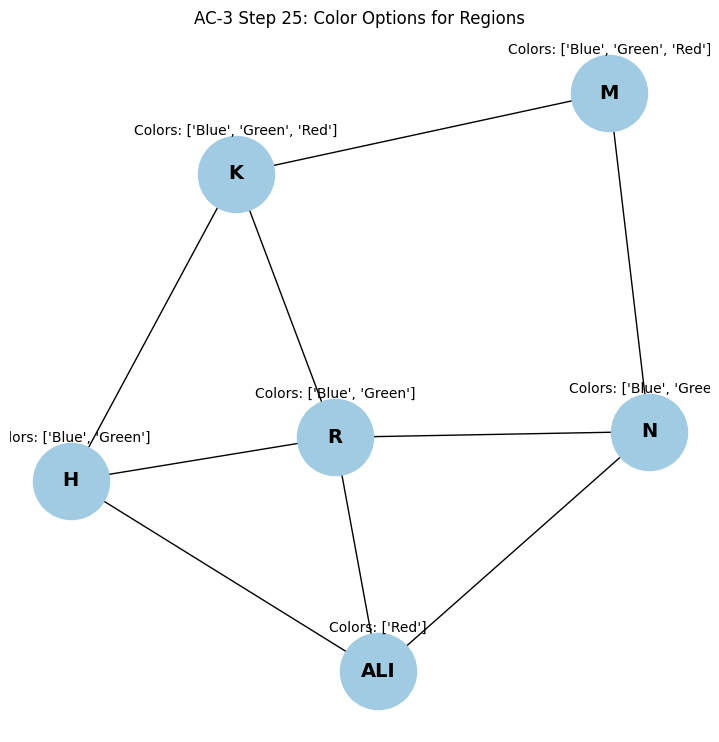


Domains after Step 26:
  ALI: {'Red'}
  N: {'Green', 'Blue'}
  R: {'Green', 'Blue'}
  H: {'Green', 'Blue'}
  M: {'Green', 'Blue', 'Red'}
  K: {'Green', 'Blue', 'Red'}


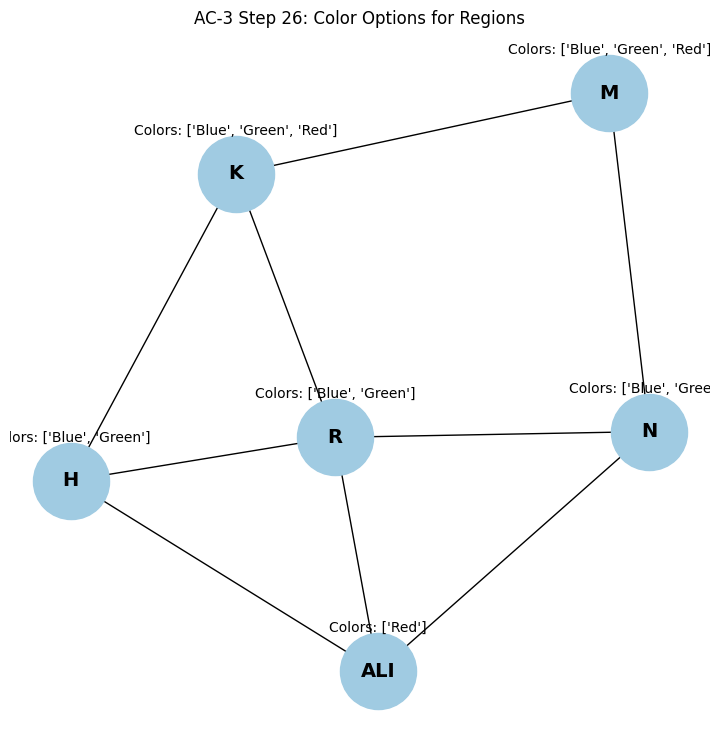

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Define the map coloring problem (6 regions)
G = nx.Graph()
edges = [
    ('ALI', 'N'),
    ('ALI', 'R'),
    ('ALI', 'H'),
    ('N', 'R'),
    ('N', 'M'),
    ('R', 'H'),
    ('R', 'K'),
    ('H', 'K'),
    ('M', 'K')
]
G.add_edges_from(edges)

# Initialize domains (available colors) for each region
domains = {
    'ALI': {'Red'},  # Initial assignment: 'A' is 'Red'
    'N': {'Red', 'Green', 'Blue'},
    'R': {'Red', 'Green', 'Blue'},
    'H': {'Red', 'Green', 'Blue'},
    'M': {'Red', 'Green', 'Blue'},
    'K': {'Red', 'Green', 'Blue'}
}

# Step 2: Visualize map coloring and domains, with adjusted label positions
def visualize_map_coloring(step, domains):
    # Use spring layout with increased spacing between nodes
    pos = nx.spring_layout(G, seed=42, k=1.0)
    plt.figure(figsize=(7, 7))

    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_color='#A0CBE2', node_size=3000, font_size=14, font_weight='bold')

    # Create labels showing the current domains (available colors)
    labels = {node: f"Colors: {sorted(domains[node])}" for node in G.nodes}

    # Adjust label positions to avoid overlap
    label_pos = {node: (coords[0], coords[1] + 0.15) for node, coords in pos.items()}

    # Draw labels at the adjusted positions
    nx.draw_networkx_labels(G, label_pos, labels=labels, font_color='black', font_size=10)

    plt.title(f"AC-3 Step {step}: Color Options for Regions")
    plt.show()

# Step 3: Simulate AC-3 algorithm to propagate color constraints (map coloring problem)
def arc_consistency_map_coloring():
    step = 1
    # Initialize arcs as a queue of all edges in both directions
    arcs = [(u, v) for u, v in G.edges()] + [(v, u) for u, v in G.edges()]

    visualize_map_coloring(step, domains)  # Initial visualization

    while arcs:
        (Xi, Xj) = arcs.pop(0)
        revised = False

        # For each value in Xi's domain, check if it's consistent with Xj's domain
        for x in list(domains[Xi]):  # Use list to avoid modifying the set during iteration
            # If all values in Xj's domain are equal to x, remove x from Xi's domain
            if all(x == y for y in domains[Xj]):
                domains[Xi].remove(x)
                revised = True
                print(f"Removed '{x}' from domain of '{Xi}' because all values in domain of '{Xj}' are equal to '{x}'.")

        if revised:
            # If Xi's domain was revised, add arcs (Xk, Xi) back to the queue
            for neighbor in G.neighbors(Xi):
                if neighbor != Xj:
                    arcs.append((neighbor, Xi))

        # Check for empty domains
        if not domains[Xi]:
            print(f"Domain of '{Xi}' is empty. No solution possible with current assignments.")
            break

        step += 1
        print(f"\nDomains after Step {step}:")
        for node in domains:
            print(f"  {node}: {domains[node]}")
        visualize_map_coloring(step, domains)  # Visualize after each revision

# Step 4: Run the AC-3 algorithm for map coloring
arc_consistency_map_coloring()


Dataset Information:
Number of samples: 442
Number of features: 10
Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Target range: 25.0 - 346.0



age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6 target  
0   -0.002592  0.019907 -0.017646    NaN  
1   -0.039493 -0.068332 -0.092204    NaN  
2   -0.002592  0.002861 -0.025930    NaN  
3    0.034309  0.022688 -0.009362    NaN  
4   -0.002592 -0.031988 -0.046641    NaN  
..        ...       ...       ...    ...  
437 -0.002592  0.031193  0.007207    NaN  
438  0.034309 -0.018114  0.044485    NaN  
439 -0.011080 -0.046883  0.015491    NaN  
440  0.026560  0.044529 -0.025930    NaN  
441 -0.039493 -0.004222  0.003064    NaN  

[442 rows x 11 columns]

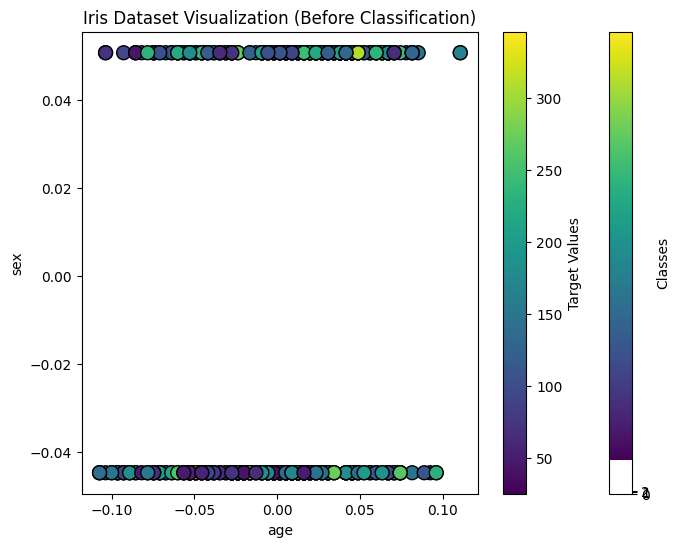

Mean Squared Error of k-NN: 3663.82
R^2 Score: 0.32


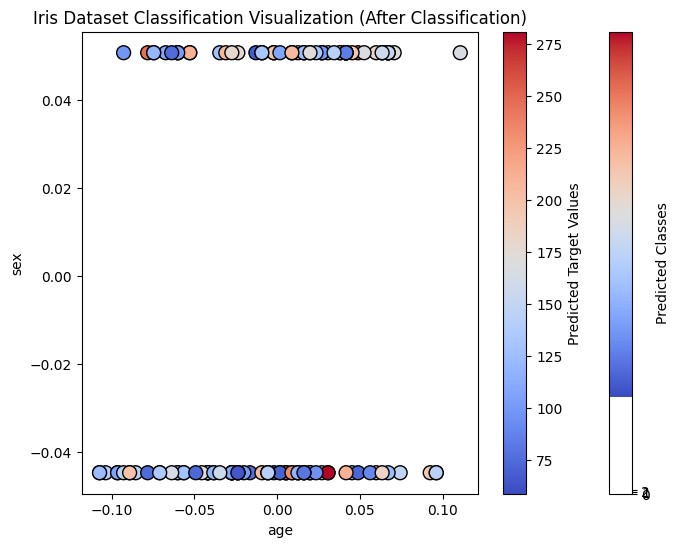

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Load the sample dataset (Diabetes dataset)
diabetes = load_diabetes()
X = diabetes.data  # Features
y = diabetes.target  # Labels (target classes)

# Display dataset information
print("Dataset Information:")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Feature names: {diabetes.feature_names}")
print(f"Target range: {np.min(y)} - {np.max(y)}\n")  # Min and max target values
# Converting the Iris dataset to a DataFrame for better visualization
diabetes_df = pd.DataFrame(data=np.c_[diabetes['data'], diabetes['target']],
                       columns=diabetes['feature_names'] + ['target'])
# Mapping target values to class names (0 -> Setosa, 1 -> Versicolor, 2 -> Virginica)
diabetes_df['target'] = diabetes_df['target'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})
# Display the first few rows of the dataset
display(diabetes_df)

# Visualizing the data before classification (using first two features for 2D plot)
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title('Iris Dataset Visualization (Before Classification)')
plt.xlabel(diabetes.feature_names[0])  # Feature 1 (sepal length)
plt.ylabel(diabetes.feature_names[1])  # Feature 2 (sepal width)
colorbar=plt.colorbar(label='Classes')
colorbar.set_ticks([0, 1, 2])
colorbar = plt.colorbar(label='Target Values')
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Implementing k-Nearest Neighbors with k=3
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)  # Train the k-NN model on the training data

# Making predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print accuracy and classification report
print(f"Mean Squared Error of k-NN: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Visualizing the data after classification (using first two features for 2D plot)
plt.figure(figsize=(8,6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', edgecolor='k', s=100)
plt.title('Iris Dataset Classification Visualization (After Classification)')
plt.xlabel(diabetes.feature_names[0])  # Feature 1 (sepal length)
plt.ylabel(diabetes.feature_names[1])  # Feature 2 (sepal width)
colorbar=plt.colorbar(label='Predicted Classes')
colorbar.set_ticks([0, 1, 2])
colorbar = plt.colorbar(label='Predicted Target Values')
plt.show()


Dataset Information:
Number of samples: 178
Number of features: 13
Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target classes: ['class_0' 'class_1' 'class_2']
Class distribution: [59 71 48]



alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline     target  
0                            3.92   1065.0     Setosa  
1                            3.40   1050.0     Setosa  
2                            3.17   1185.0     Setosa  
3                            3.45   1480.0     Setosa  
4                            2.93    735.0     Setosa  
..                            ...      ...        ...  
173                          1.74    740.0  Virginica  
174                          1.56    750.0  Virginica  
175                          1.56    835.0  Virginica  
176                          1.62    840.0  Virginica  
177                          1.60    560.0  Virginica  

[178 rows x 14 columns]

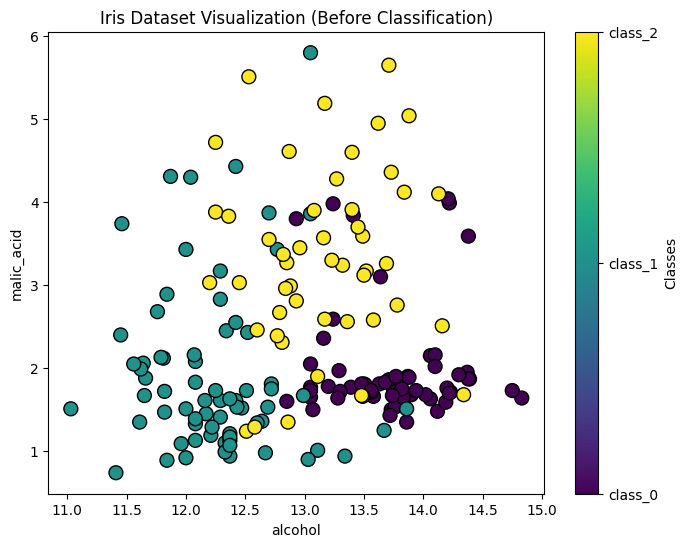

Accuracy of k-NN: 74.07%

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54



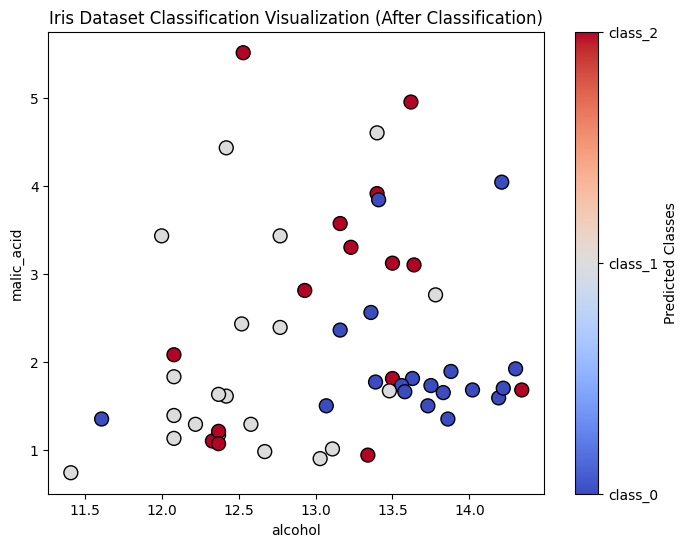

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


# Load the sample dataset (Iris dataset)
wine = load_wine()
X = wine.data  # Features
y = wine.target  # Labels (target classes)

# Display dataset information
print("Dataset Information:")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Feature names: {wine.feature_names}")
print(f"Target classes: {wine.target_names}")
print(f"Class distribution: {np.bincount(y)}\n")  # Shows how many samples per class

# Converting the Iris dataset to a DataFrame for better visualization
iris_df = pd.DataFrame(data=np.c_[wine['data'], wine['target']],
                       columns=wine['feature_names'] + ['target'])
# Mapping target values to class names (0 -> Setosa, 1 -> Versicolor, 2 -> Virginica)
iris_df['target'] = iris_df['target'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})
# Display the first few rows of the dataset
display(iris_df)

# Visualizing the data before classification (using first two features for 2D plot)
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title('Iris Dataset Visualization (Before Classification)')
plt.xlabel(wine.feature_names[0])  # Feature 1 (sepal length)
plt.ylabel(wine.feature_names[1])  # Feature 2 (sepal width)
colorbar=plt.colorbar(label='Classes')
colorbar.set_ticks([0, 1, 2])
colorbar.set_ticklabels(wine.target_names)  # Adding class labels to colorbar
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Implementing k-Nearest Neighbors with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)  # Train the k-NN model on the training data

# Making predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print accuracy and classification report
print(f"Accuracy of k-NN: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_rep)

# Visualizing the data after classification (using first two features for 2D plot)
plt.figure(figsize=(8,6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', edgecolor='k', s=100)
plt.title('Iris Dataset Classification Visualization (After Classification)')
plt.xlabel(wine.feature_names[0])  # Feature 1 (sepal length)
plt.ylabel(wine.feature_names[1])  # Feature 2 (sepal width)
colorbar=plt.colorbar(label='Predicted Classes')
colorbar.set_ticks([0, 1, 2])
colorbar.set_ticklabels(wine.target_names)  # Adding class labels to colorbar
plt.show()


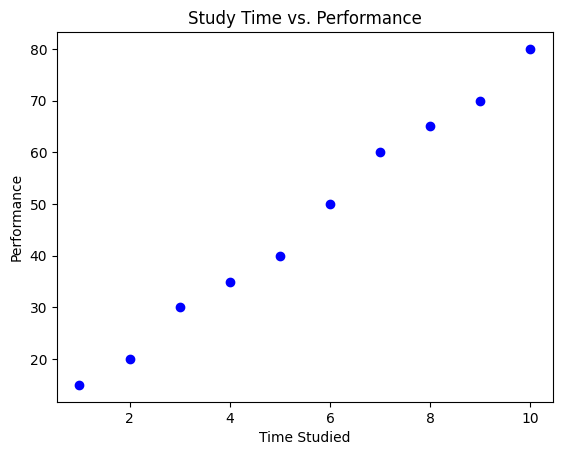

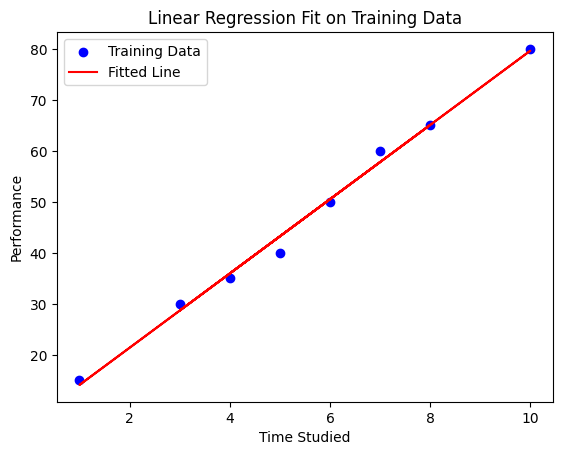

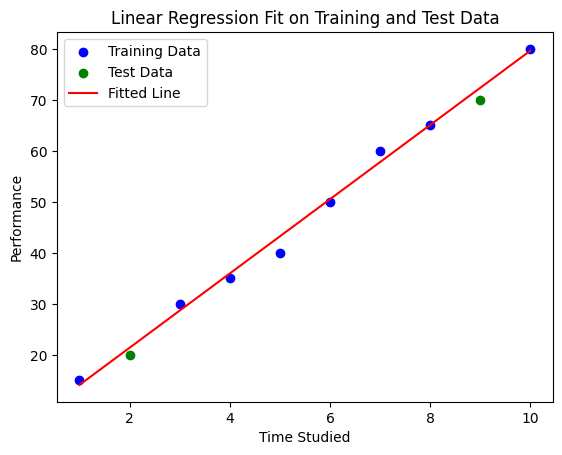

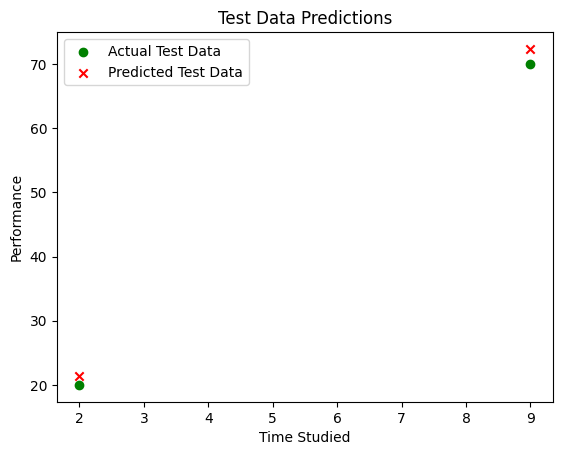

Slope (Coefficient): 7.28448275862069
Intercept: 6.810344827586206
Mean Squared Error (MSE): 3.7613332342449795
R-squared: 0.9939818668252081


In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Create a simple dataset
# Hours of study (independent variable) and corresponding scores (dependent variable)
time = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
performance = np.array([15, 20, 30, 35, 40, 50, 60, 65, 70, 80])

# Step 2: Visualize the data
plt.scatter(time, performance, color='blue')
plt.title('Study Time vs. Performance')
plt.xlabel('Time Studied')
plt.ylabel('Performance')
plt.show()

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(time, performance, test_size=0.2, random_state=42)

# Step 4: Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Visualize the fitted line on the training data
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, model.predict(X_train), color='red', label='Fitted Line')
plt.title('Linear Regression Fit on Training Data')
plt.xlabel('Time Studied')
plt.ylabel('Performance')
plt.legend()
plt.show()

# Step 6: Visualize the fitted line on both training and test data
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(time, model.predict(time), color='red', label='Fitted Line')
plt.title('Linear Regression Fit on Training and Test Data')
plt.xlabel('Time Studied')
plt.ylabel('Performance')
plt.legend()
plt.show()

# Step 7: Make predictions on the test set and visualize
y_pred = model.predict(X_test)
plt.scatter(X_test, y_test, color='green', label='Actual Test Data')
plt.scatter(X_test, y_pred, color='red', marker='x', label='Predicted Test Data')
plt.title('Test Data Predictions')
plt.xlabel('Time Studied')
plt.ylabel('Performance')
plt.legend()
plt.show()

# Step 8: Display the model's slope (coefficient) and intercept
slope = model.coef_[0]
intercept = model.intercept_
print(f'Slope (Coefficient): {slope}')
print(f'Intercept: {intercept}')

# Step 9: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r2}')


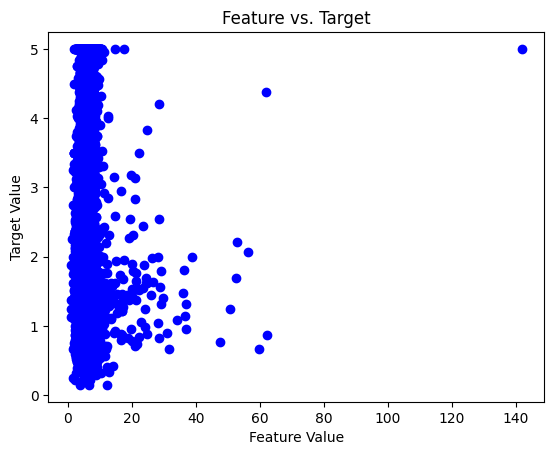

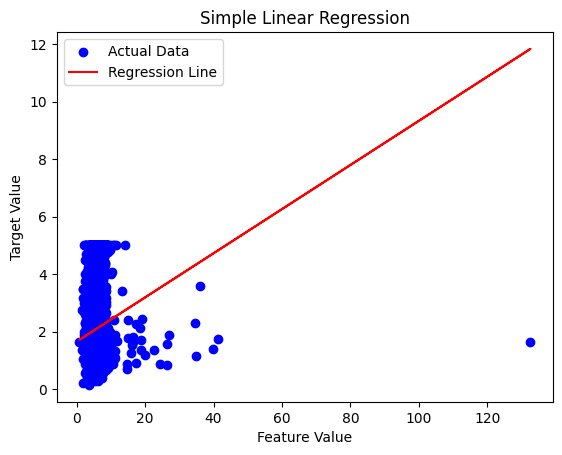

Mean Squared Error (MSE): 1.2923314440807299
R-squared: 0.013795337532284901
Slope (Coefficient): 0.07675558963126741
Intercept: 1.6547622685968417


In [ ]:
# Importing necessary libraries
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
from sklearn import datasets  # To load built-in datasets
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.linear_model import LinearRegression  # To create a linear regression model
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating model performance
from sklearn.datasets import fetch_california_housing

# Load the diabetes dataset
california = fetch_california_housing()

# Use only one feature (e.g., the second feature) for simple linear regression
X = california.data[:, np.newaxis, 2]  # np.newaxis is used to change the shape to 2D as required by Scikit-learn
y = california.target  # Target variable (disease progression)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the training data points (Optional visualization)
plt.scatter(X_train, y_train, color='blue')
plt.title('Feature vs. Target')
plt.xlabel('Feature Value')
plt.ylabel('Target Value')
plt.show()

# Create a LinearRegression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = model.predict(X_test)

# Plot the test data points and the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.title('Simple Linear Regression')
plt.xlabel('Feature Value')
plt.ylabel('Target Value')
plt.legend()
plt.show()

# Calculate Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r2}')

# Get the slope (coefficient) and intercept of the regression line
slope = model.coef_[0]
intercept = model.intercept_

print(f'Slope (Coefficient): {slope}')
print(f'Intercept: {intercept}')

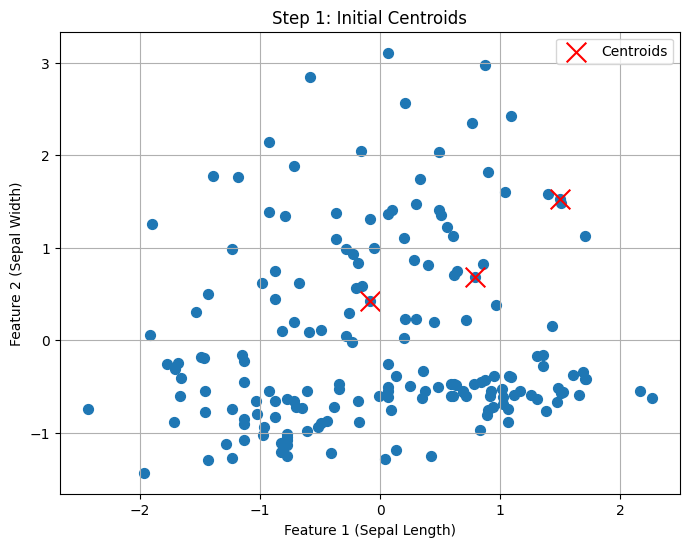

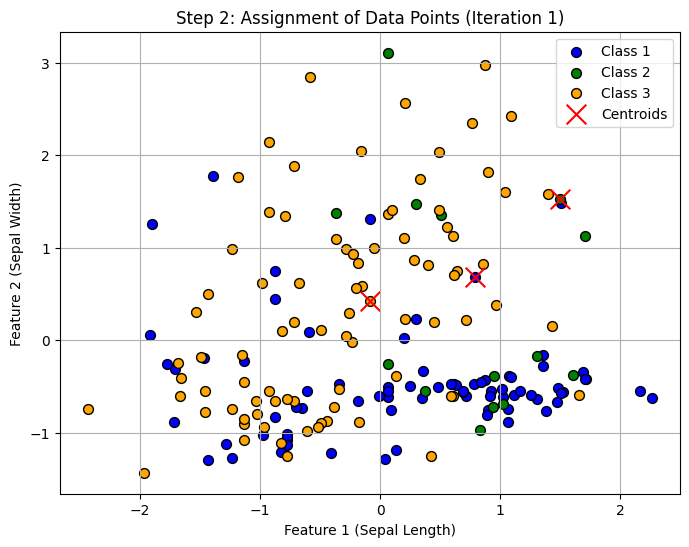

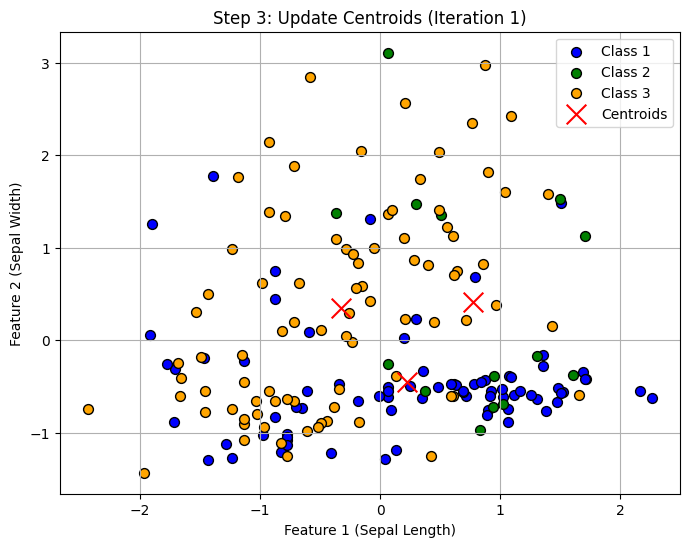

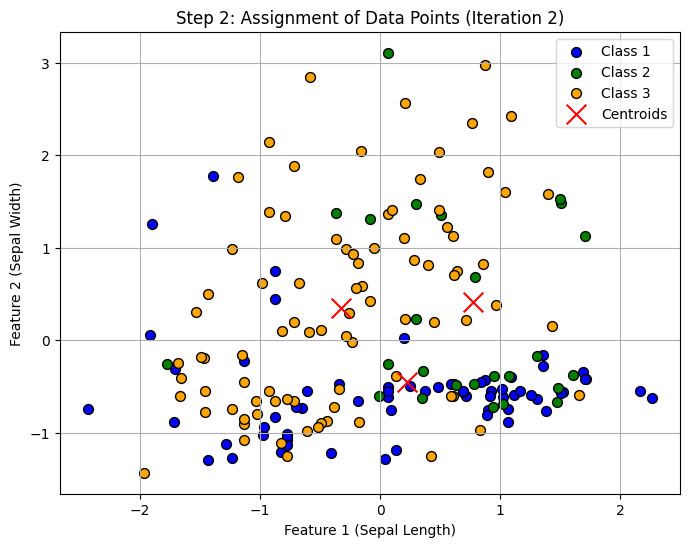

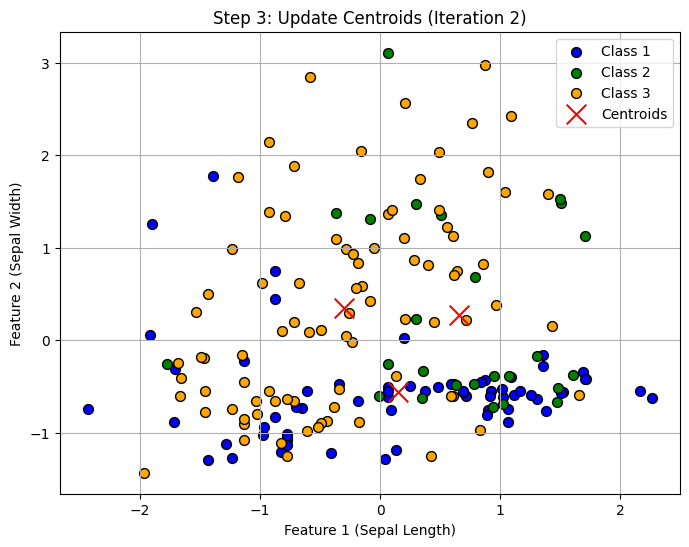

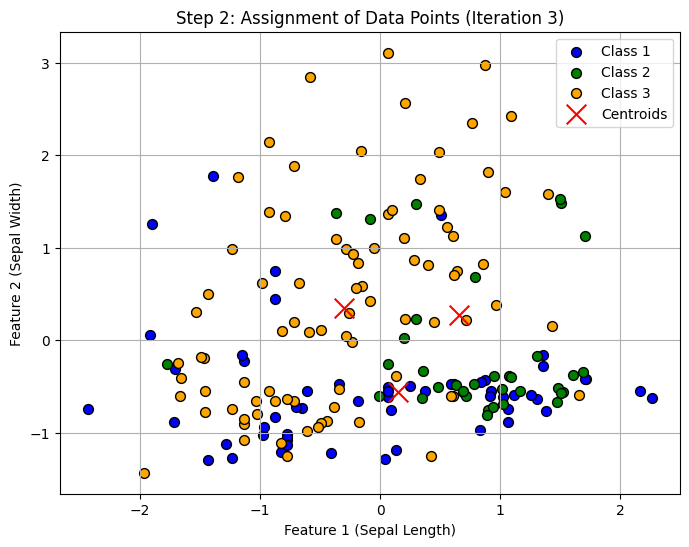

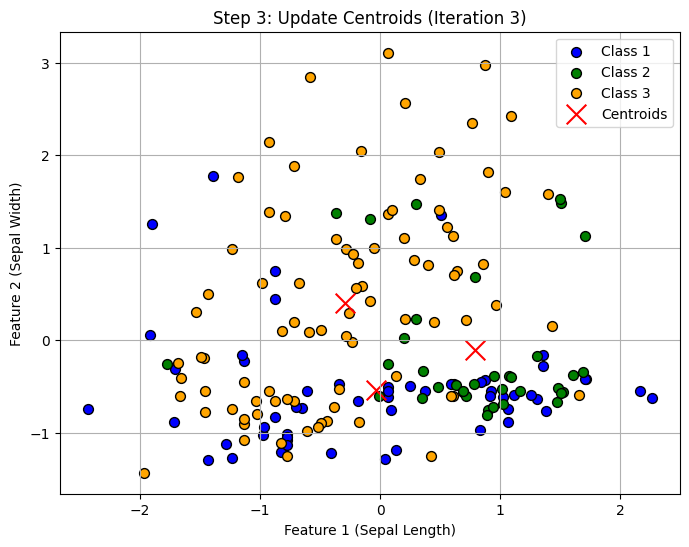

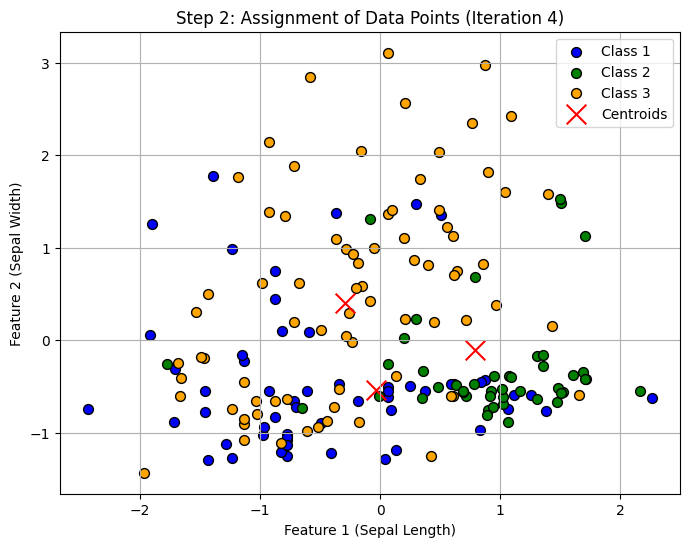

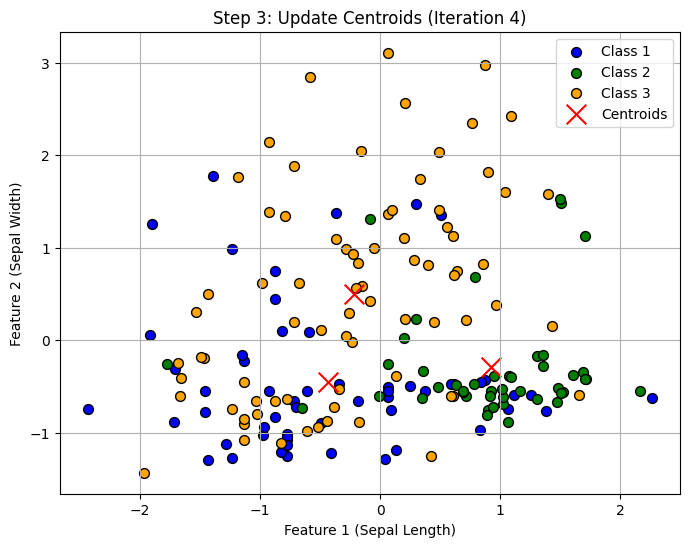

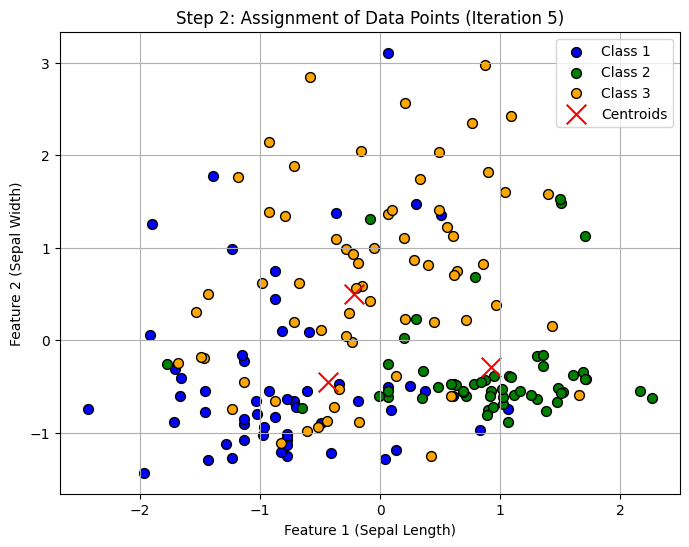

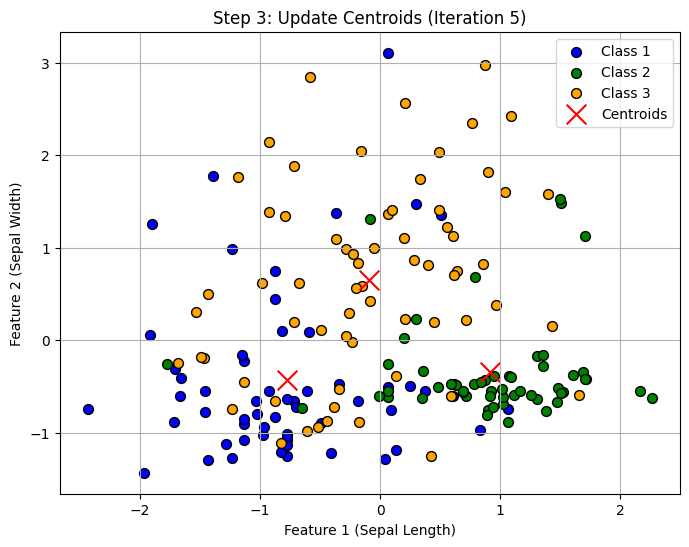

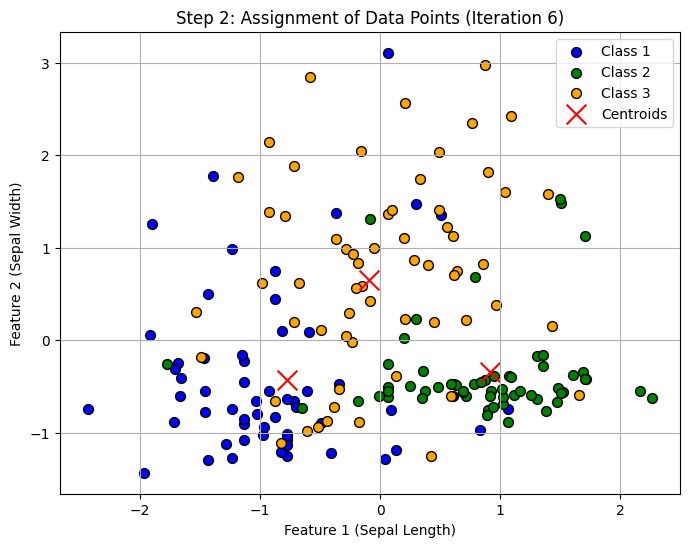

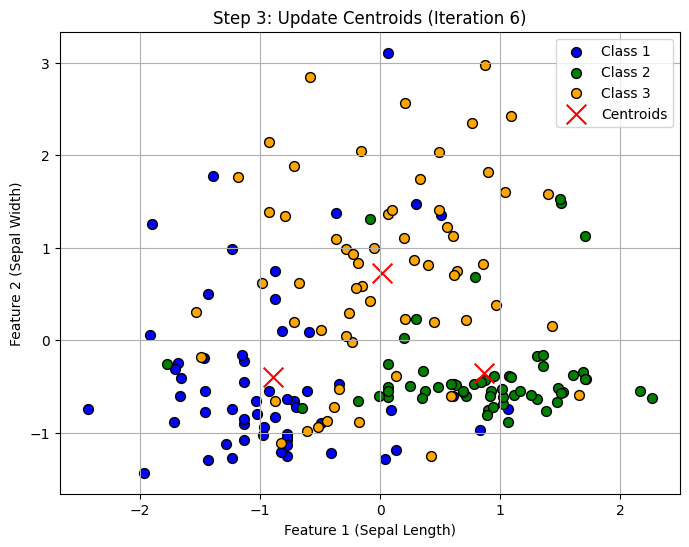

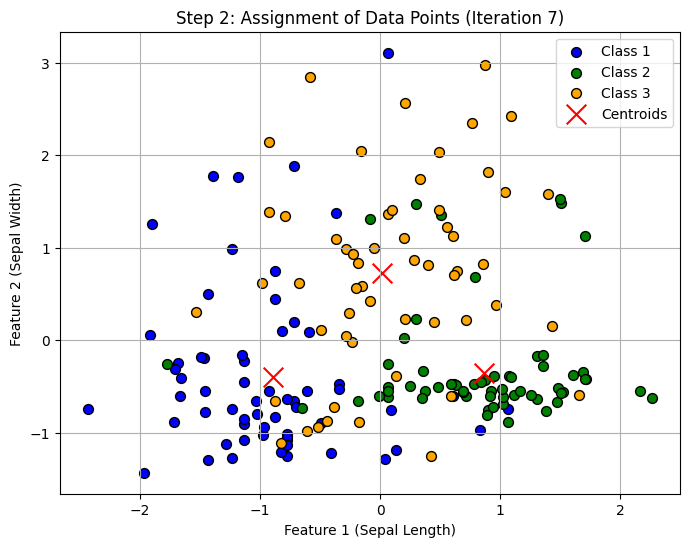

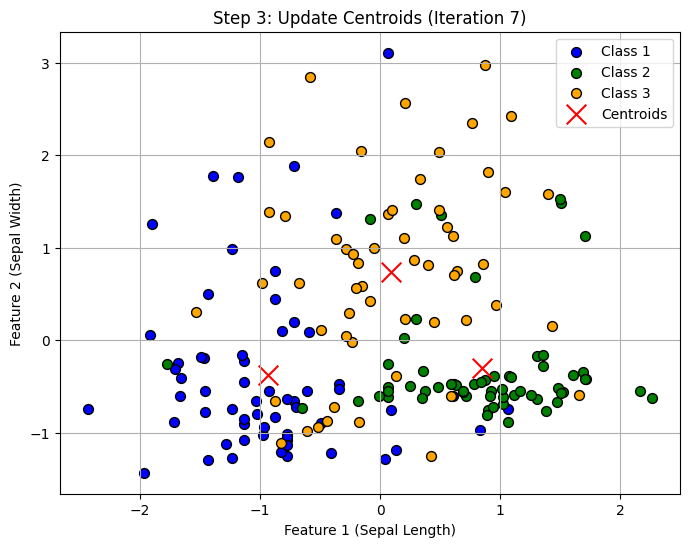

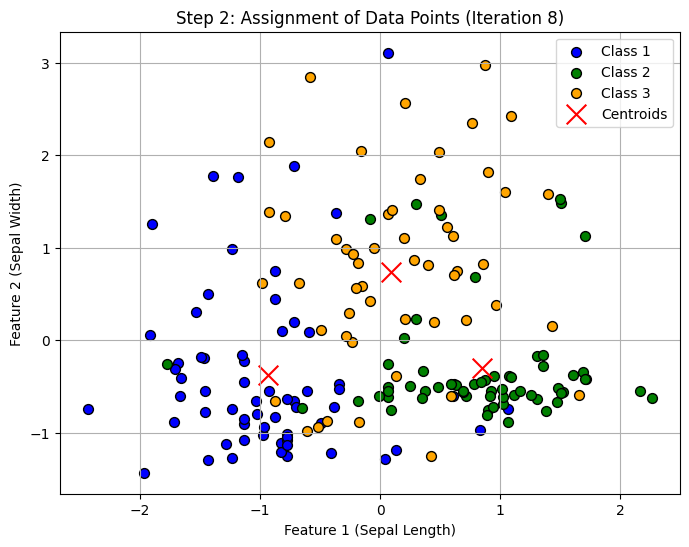

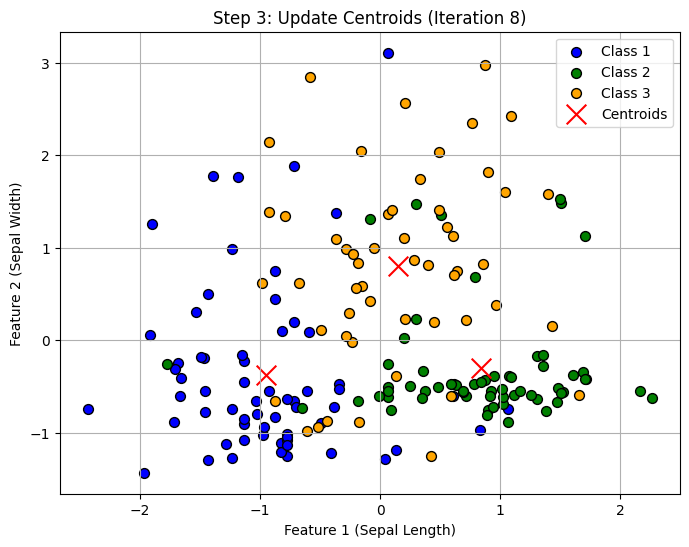

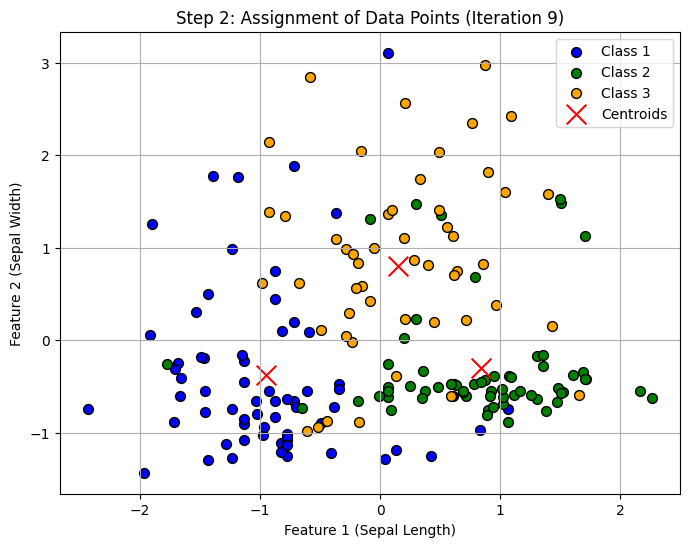

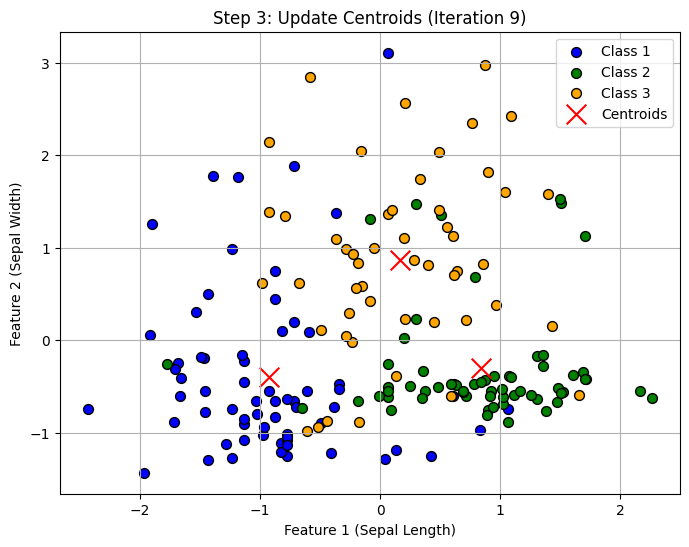

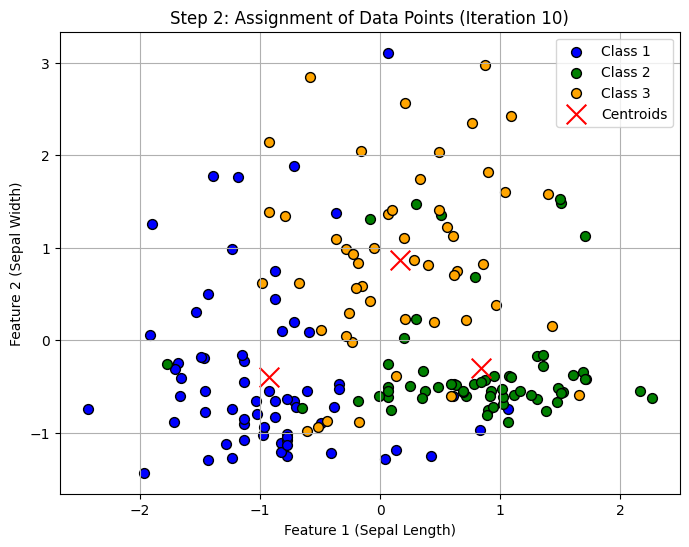

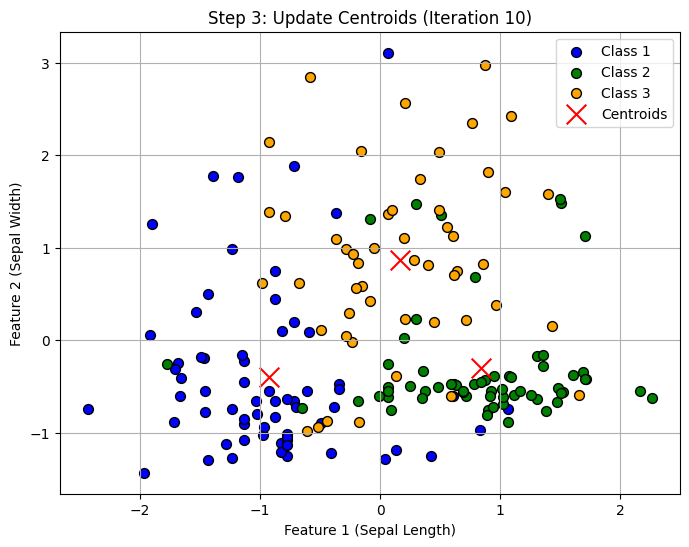

In [ ]:
# Import necessary libraries
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For visualizations
from sklearn.datasets import load_wine  # Load a built-in dataset
from sklearn.preprocessing import StandardScaler  # For feature scaling

# Load the Iris dataset
wine = load_wine()
X = wine.data  # Only use the features for clustering

# Standardize the features to ensure all features have the same scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to calculate the Euclidean distance between two points
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Function to implement k-Means Clustering with step-by-step visualizations
def kmeans(X, k, max_iterations=100):
    np.random.seed(42)  # Seed for reproducibility
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]  # Step 1: Initialize centroids
    visualize_step(X, centroids, None, title="Step 1: Initial Centroids")  # Visualize initial centroids

    for iteration in range(max_iterations):
        # Step 2: Assign each data point to the closest centroid
        labels = np.array([np.argmin([euclidean_distance(x, centroid) for centroid in centroids]) for x in X])
        visualize_step(X, centroids, labels, title=f"Step 2: Assignment of Data Points (Iteration {iteration + 1})")

        # Step 3: Calculate new centroids based on mean of assigned points
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        visualize_step(X, new_centroids, labels, title=f"Step 3: Update Centroids (Iteration {iteration + 1})")

        # If centroids do not change, break the loop (algorithm converged)
        if np.all(centroids == new_centroids):
            break

        # Update centroids for the next iteration
        centroids = new_centroids

    return centroids, labels

# Function to visualize clustering process at each step, with class names in the legend
def visualize_step(X, centroids, labels=None, title="Clustering Step"):
    plt.figure(figsize=(8, 6))

    # Create a dictionary for class names and their corresponding colors
    class_names = {0: 'Class 1', 1: 'Class 2', 2: 'Class 3'}
    colors = ['blue', 'green', 'orange']

    # Plot data points with labels if they exist
    if labels is not None:
        for class_label in np.unique(labels):
            plt.scatter(X[labels == class_label, 0], X[labels == class_label, 1],
                        label=class_names[class_label], s=50, edgecolor='k', color=colors[class_label])
    else:
        plt.scatter(X[:, 0], X[:, 1], s=50)

    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=200, label='Centroids')

    plt.title(title)
    plt.xlabel('Feature 1 (Sepal Length)')
    plt.ylabel('Feature 2 (Sepal Width)')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Set the number of clusters (k)
k = 3  # We are setting 3 clusters since Iris has 3 categories

# Run the k-Means algorithm with visualizations for each step
centroids, labels = kmeans(X_scaled, k)


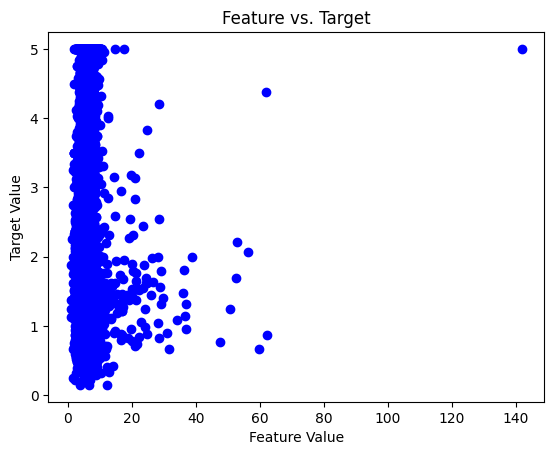

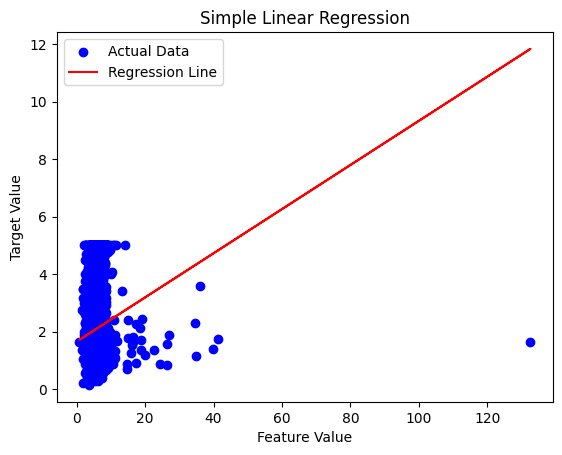

Mean Squared Error (MSE): 1.2923314440807299
R-squared: 0.013795337532284901
Slope (Coefficient): 0.07675558963126741
Intercept: 1.6547622685968417


In [ ]:
# Importing necessary libraries
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
from sklearn import datasets  # To load built-in datasets
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.linear_model import LinearRegression  # To create a linear regression model
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating model performance
from sklearn.datasets import fetch_california_housing



# Load the diabetes dataset
california = fetch_california_housing()

# Use only one feature (e.g., the second feature) for simple linear regression
X = california.data[:, np.newaxis, 2]  # np.newaxis is used to change the shape to 2D as required by Scikit-learn
y = california.target  # Target variable (disease progression)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the training data points (Optional visualization)
plt.scatter(X_train, y_train, color='blue')
plt.title('Feature vs. Target')
plt.xlabel('Feature Value')
plt.ylabel('Target Value')
plt.show()

# Create a LinearRegression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = model.predict(X_test)

# Plot the test data points and the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.title('Simple Linear Regression')
plt.xlabel('Feature Value')
plt.ylabel('Target Value')
plt.legend()
plt.show()

# Calculate Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r2}')

# Get the slope (coefficient) and intercept of the regression line
slope = model.coef_[0]
intercept = model.intercept_

print(f'Slope (Coefficient): {slope}')
print(f'Intercept: {intercept}')
